# PROJET 4 - Analyse de données

Cette partie sera composée d'analyses de nos données nettoyées précédemment. Elle permettra de mieux comprendre les ventes de l'entreprise _"Rester livres"_.  
Cette analyse sera faite grâce à des **indicateurs de tendances centrales** et **de dispersion** ; d'**analyses de concentration** (via une courbe de Lorenz et un indice de Gini) ; de **représentations graphiques** ; d' **analyses bivariées** et de **corrélations**.

## Importation des modules

_Importation des modules nécessaires pour l'analyse des données._

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

import statsmodels.api as sm
import math

## Chargement des données

In [2]:
rester_livres = pd.read_csv("rester_livres.csv")
clients = pd.read_csv("clients.csv")
visiteurs = pd.read_csv("visiteurs.csv")
produits_invendus = pd.read_csv("produits_invendus.csv")

produits = pd.read_csv("produits.csv")
transacts = pd.read_csv("transacts.csv")
clients_clean = pd.read_csv("clients_clean.csv")
transacts_produits = pd.read_csv("transacts_produits.csv")

----

# Mission n°2 - Analyse de données

Dans cette partie, nous nous appuyerons sur des indicateurs clés de performance (KPI). Ils ne permettront de réaliser une analyse assez complète des ventes et du comportement des clients ainsi que des visiteurs.

### 1. Description des clients et des visiteurs

#### 1.1. Clients

Un client est un visiteur qui a effectué au moins un achat sur le site.

##### 1.1.1. Âge des clients 

In [3]:
# Date du dernier achat
rester_livres.sort_values('date').tail(1)

id_prod        date session_id client_id  price  categ sex  birth  age  \
248488  0_1440  2022 02 28   s_172110     c_425   5.62    0.0   f   1979   43   

       tranche_age  jour  mois  heure moment jour  
248488       31-50    28     2      8       Matin

Les derniers achats sont réalisés en 2022. On l'utilise donc comme année de référence.

In [4]:
# On détermine l'âge des clients
clients = clients_clean.copy()

current_year = 2022 #datetime.datetime.now().year

clients["age"]= current_year - clients["birth"]
clients.head()

client_id sex  birth  age
0    c_4410   f   1967   55
1    c_7839   f   1975   47
2    c_1699   f   1984   38
3    c_5961   f   1962   60
4    c_5320   m   1943   79

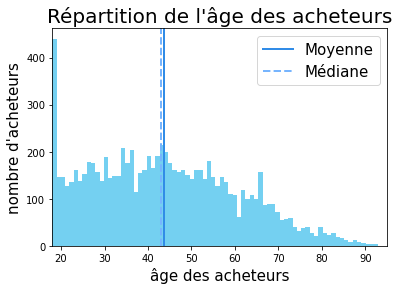

In [5]:
# Histogramme âge
plt.title("Répartition de l'âge des acheteurs", size=20)

plt.ylabel("nombre d'acheteurs", size=15)
plt.xlabel("âge des acheteurs", size=15)
plt.xlim(18,95)
plt.hist(clients['age'], bins=76, color='#74D0F1')
plt.axvline(x=clients['age'].mean(), label='Moyenne', linestyle='-', linewidth=2, color="#318CE7")
plt.axvline(x=clients['age'].median(), label='Médiane', linestyle='--', linewidth=2, color="#77B5FE")
plt.legend(prop={"size":15})
plt.savefig("/Users/anissa/01_Repartition de l'âge des acheteurs.jpg", dpi=1200)

plt.show()

Remarque : on constate un pic pour les personnes âgées de 18 ans.  
Possibilité : les visiteurs remplissent un âge par défaut dans le formulaire (formulaire d'inscription, il faut avoir au moins 18 ans pour effectuer un achat / souhait de garder une confidentialité)

In [6]:
# Moyenne d'âge des clients et âge médian
moy_age = clients["age"].mean()

med_age = clients["age"].median()

print("La moyenne d'âge des clients est de", round(moy_age,2),"ans. L'âge médian est de", round(med_age,2),"ans.")

La moyenne d'âge des clients est de 43.72 ans. L'âge médian est de 43.0 ans.


##### 1.1.2. Genre des clients

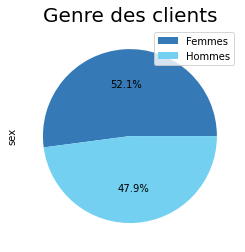

In [7]:
# Diagramme genre
colors = ["#357AB7","#74D0F1"]
labels = ["Femmes", "Hommes"]

plt.title("Genre des clients", size=20)

clients["sex"].value_counts(normalize=True).plot.pie(autopct="%.1f%%", 
                                                     colors = colors, 
                                                     labels=None)

plt.legend(labels,loc="best")
plt.savefig("/Users/anissa/02_Genre des clients.jpg", dpi=1200)

plt.show()

#### 1.2. Visiteurs

Le visiteur est un individu qui visite un site internet sans y avoir effectué d'achat

##### 1.2.1. Âge des visiteurs

In [8]:
# On détermine l'âge de chaque visiteur
visiteurs["age"] = 2022 - visiteurs["birth"]
visiteurs.head()

client_id sex   birth   age
0    c_8253   f  2001.0  21.0
1    c_3789   f  1997.0  25.0
2    c_4406   f  1998.0  24.0
3    c_2706   f  1967.0  55.0
4    c_3443   m  1959.0  63.0

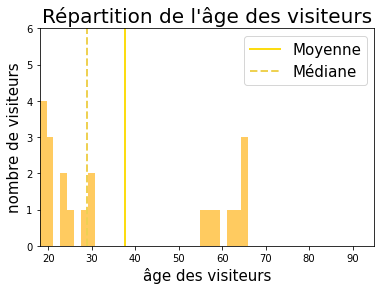

In [9]:
# Histogramme âge
plt.title("Répartition de l'âge des visiteurs", size=20)

plt.xlabel("âge des visiteurs", size=15)
plt.ylabel("nombre de visiteurs", size=15)
plt.xlim(18,95)
plt.ylim(0,6)
plt.hist(visiteurs['age'], bins=30, color='#FFCB60')
plt.axvline(x=visiteurs['age'].mean(), label='Moyenne', linestyle='-', linewidth=2, color="#FCDC12")
plt.axvline(x=visiteurs['age'].median(), label='Médiane', linestyle='--', linewidth=2, color="#EED153")
plt.legend(prop={"size":15})
plt.savefig("/Users/anissa/03_Repartition de l'âge des visiteurs.jpg", dpi=1200)
plt.show()

Remarque : on constate un pic pour les personnes âgées de 18 ans.  
Possibilité : les visiteurs remplissent un âge par défaut dans le formulaire (formulaire d'inscription, il faut avoir au moins 18 ans pour effectuer un achat / souhait de garder une confidentialité)

In [10]:
# Moyenne d'âge des visiteurs et âge médian
moy_visiteurs = visiteurs["age"].mean()

med_visiteurs = visiteurs["age"].median()

print("La moyenne d'âge des visiteurs est de",round(moy_visiteurs,2),"ans. L'âge médian est de",round(med_visiteurs,2),"ans.")

La moyenne d'âge des visiteurs est de 37.62 ans. L'âge médian est de 29.0 ans.


##### 1.2.2. Genre des visiteurs

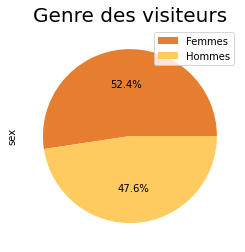

In [11]:
# Diagramme genre
colors = ["#E67E30","#FFCB60"]
labels = ["Femmes","Hommes"]

plt.title("Genre des visiteurs", size=20)

visiteurs["sex"].value_counts(normalize=True).plot.pie(autopct="%.1f%%", 
                                                       colors = colors,
                                                       labels=None)
plt.legend(labels,loc="best")
plt.savefig("/Users/anissa/04_Genre des visiteurs.jpg", dpi=1200)
plt.show()

#### 1.3. Taux de conversion

In [ ]:
tx_conversion = (clients.shape[0]/transacts.shape[0])*100
tx_conversion
print("Le taux de conversion est de",round(tx_conversion,2),"%.")

----

### 2. Analyse des transactions

#### 2.1. Nombre de transactions

In [13]:
print("Le nombre de transactions s'élève à",transacts.shape[0],"sur le site.")

Le nombre de transactions s'élève à 336816 sur le site.


#### 2.2. Valeurs moyennes des transactions pour chaque catégorie

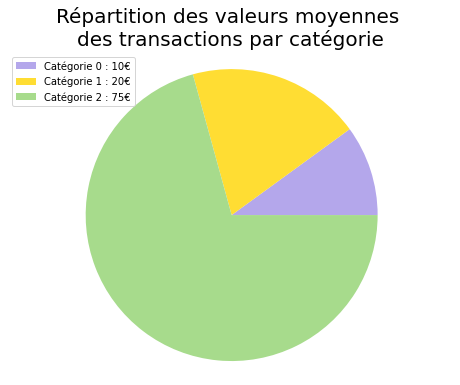

In [14]:
valeurs_transacts = transacts_produits[['categ', 'price']]\
                                    .groupby('categ').mean().reset_index()

plt.figure(figsize=(8, 6))
my_pal=["#B4A7EB","#FFDD33","#A7DB8C"]
labels = ["Catégorie 0 : 10€","Catégorie 1 : 20€","Catégorie 2 : 75€"]

plt.pie(valeurs_transacts.price, labels=None, 
        textprops={'fontsize': 20}, 
        colors=my_pal)
plt.axis('equal')
plt.legend(labels, loc="best")

plt.title('Répartition des valeurs moyennes \ndes transactions par catégorie',
          fontsize=(20))
plt.savefig("/Users/anissa/05_Répartition des valeurs moyennes des transactions par catégorie.jpg", dpi=1200)

On va déterminer un code couleur pour les catégories de produits et nous y tiendrons pour plus de lisibilité.  
**Violet** : catégorie 0, **jaune** : catégorie 1 et **vert** : catégorie 2.

#### 2.3. Répartition des prix des articles en fonction de la catégorie

##### 2.3.1. Écart-type par catégorie

In [15]:
# Écart type par catégorie 
transacts_produits.groupby(by="categ").std()

price
categ           
0.0     4.928818
1.0     7.568956
2.0    39.079999

Il semblerait que les prix de la catégorie 2 soient plus dispersés que ceux des autres catégories (écart-type plus élevé). On peut penser que les prix de la catégorie 2 sont plus hétérogènes que ceux des autres catégories. 

##### 2.3.2. Comparaison de l'écart-type avec la moyenne

In [16]:
# Prix moyen en fonction des catégories
transacts_produits.groupby(by="categ").mean()

price
categ           
0.0    10.646828
1.0    20.480106
2.0    75.174949

Catégorie 0 : prix moyen, 10€. Les prix des produits de la catégorie 0 s'écartent d'environ de 4€ en moyenne du prix moyen de la catégorie.  
Catégorie 1 : prix moyen, 20€. Les prix des produits de la catégorie 1 s'écartent de 7€ en moyenne du prix moyen de la catégorie.  
Catégorie 2 : prix moyen, 39€. Les prix des produits de la catégorie 2 s'écartent de 39€ en moyenne du prix moyen de la catégorie.

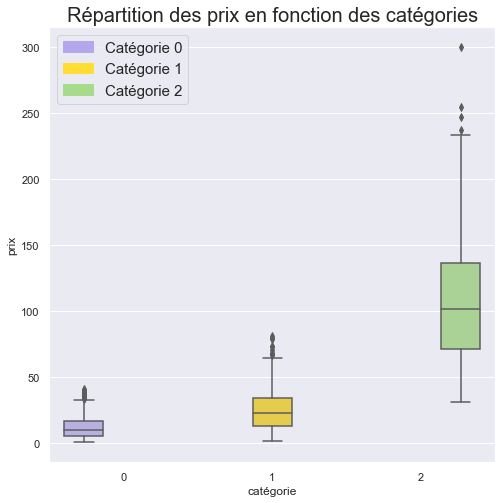

In [17]:
# Boîte à moustache (boxplot)
sns.set(rc={'figure.figsize':(8,8)})
my_pal = ["#B4A7EB","#FFDD33","#A7DB8C"]

plt.title("Répartition des prix en fonction des catégories", size=20)

boxplot_prix = sns.boxplot(x="categ",y="price", 
                           data=produits, 
                           hue="categ", 
                           palette=my_pal)
boxplot_prix.set(xlabel="catégorie",ylabel="prix")

categ0 = mpatches.Patch(color="#B4A7EB", label="Catégorie 0")
categ1 = mpatches.Patch(color="#FFDD33", label="Catégorie 1")
categ2 = mpatches.Patch(color="#A7DB8C", label="Catégorie 2")

boxplot_prix.legend(handles=[categ0,categ1,categ2], prop={"size":15})
plt.savefig("/Users/anissa/06_Répartition des prix en fonction des catégories.jpg", dpi=1200)
plt.show()

Grâce à la représentation graphique en boîte à moustache, on constate bien que les prix de la catégorie 2 sont plus dispersés que les autres catégories.  
C'est la catégorie 0 qui a une plus forte concentration. Tandis que pour la catégorie 2, on voit un prix (outlier) de 300€ alors que le prix médian de la catégorie est de 100€.

----

### 3. Chiffre d'affaires et volume des ventes

#### 3.1. Chiffre d'affaires

In [18]:
# Calcul chiffre d'affaires annuel moyen
ca_annuel = rester_livres["price"].sum()
print("Le chiffre d'affaires de Rester livres s'élève à",round(ca_annuel/1e6,2),"millions d'euros.")

Le chiffre d'affaires de Rester livres s'élève à 5.8 millions d'euros.


In [19]:
# Calcul chiffre d'affaires mensuel moyen
ca_mensuel = ca_annuel/12
print("Le chiffre d'affaires mensuel s'élève à environ",round(ca_mensuel,2),"euros.")

Le chiffre d'affaires mensuel s'élève à environ 483139.53 euros.


In [20]:
# Calcul chiffre d'affaire journalier moyen
ca_jour = ca_annuel/365
print("Le chiffre d'affaires journalier est d'environ",round(ca_jour,2),"euros.")

Le chiffre d'affaires journalier est d'environ 15884.04 euros.


##### 3.1.1. Évolution du chiffre d'affaires sur la période

In [21]:
# Conversion des dates
transacts_produits.date=pd.to_datetime(transacts_produits.date)

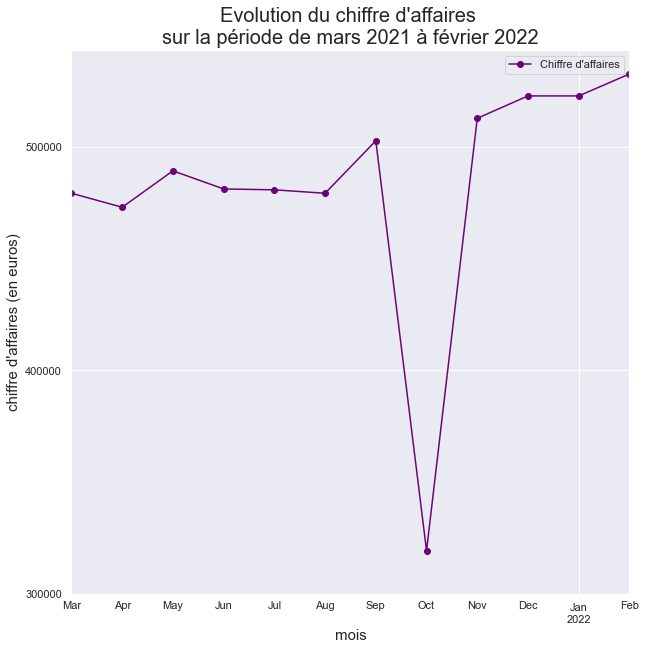

In [22]:
# Evolution du chiffre d'affaires sur la période
ChiffreAffaires= transacts_produits[["price","date"]].set_index("date")\
                                    .groupby(pd.Grouper(freq="M")).sum()

ChiffreAffaires["Chiffre d'affaires"]=ChiffreAffaires["price"]
ChiffreAffaires=ChiffreAffaires.drop(columns="price")

ChiffreAffaires.plot(figsize=(10,10),marker="o",
                     color="#6C0277",
                     yticks=(300000,400000,500000))

plt.xlabel("mois", size=15)
plt.ylabel("chiffre d'affaires (en euros)", size=15)
plt.title("Evolution du chiffre d'affaires \nsur la période de mars 2021 à février 2022", size=20)

plt.savefig("/Users/anissa/07_Evolution du chiffre d'affaires.jpg", dpi=1200)

Remarque : on constate une forte chute du CA en octobre

***Évolution du chiffre d'affaires en fonction de la catégorie***

In [23]:
# Création df ventes avec le moment de la journée
ventes = transacts_produits.copy()
ventes['session_date'] = pd.to_datetime(ventes['date'])

ventes['jour'] = ventes['session_date'].map(lambda d: d.day)
ventes['mois_annee'] = ventes['session_date'].apply(lambda x: x.strftime("%b %Y"))
ventes['mois'] = ventes['session_date'].apply(lambda d: d.month)
ventes['année'] = ventes['session_date'].map(lambda d: d.year)
ventes['heure'] = ventes['session_date'].map(lambda d: d.hour)

def moment_jour(value):
    if 14 <= value < 22:
        return 'Après-midi'
    elif 6 <= value < 14:
        return 'Matin'
    else:
        return 'Soir'

ventes['moment jour'] = ventes['heure'].map(moment_jour)
                                              
ventes['date'] = ventes['session_date'].dt.strftime('%Y %m %d')

ventes.head()

id_prod        date session_id client_id  price  categ  \
0  0_1483  2021 04 10    s_18746    c_4450   4.99    0.0   
1   2_226  2022 02 03   s_159142     c_277  65.75    2.0   
2   1_374  2021 09 23    s_94290    c_4270  10.71    1.0   
3  0_2186  2021 10 17   s_105936    c_4597   4.20    0.0   
4  0_1351  2021 07 17    s_63642    c_1242   8.99    0.0   

                session_date  jour mois_annee  mois  année  heure moment jour  
0 2021-04-10 18:37:28.723910    10   Apr 2021     4   2021     18  Après-midi  
1 2022-02-03 01:55:53.276402     3   Feb 2022     2   2022      1        Soir  
2 2021-09-23 15:13:46.938559    23   Sep 2021     9   2021     15  Après-midi  
3 2021-10-17 03:27:18.783634    17   Oct 2021    10   2021      3        Soir  
4 2021-07-17 20:34:25.800563    17   Jul 2021     7   2021     20  Après-midi

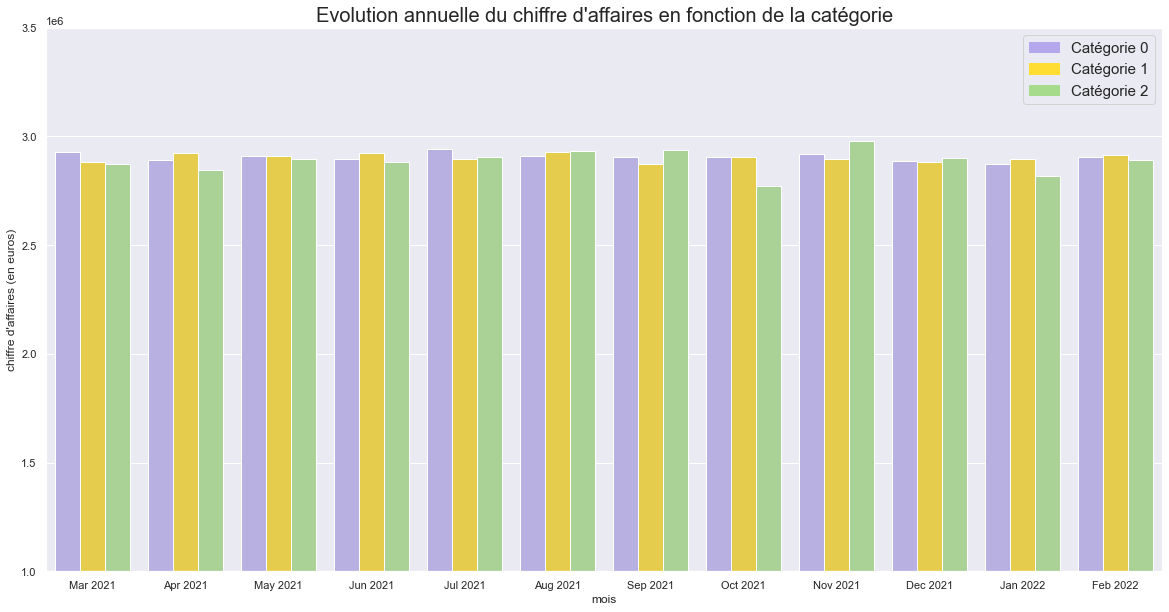

In [24]:
# Evolution chiffre d'affaires en fonction catégorie (annuelle) 
sns.set(rc={"figure.figsize":(20,10)})

ventes["CA"]= np.cumsum(ventes.price)

pal = ["#B4A7EB","#FFDD33","#A7DB8C"]

mois_ordre = ["Mar 2021","Apr 2021", "May 2021", "Jun 2021", "Jul 2021", 
             "Aug 2021", "Sep 2021", "Oct 2021", "Nov 2021", "Dec 2021",
             "Jan 2022", "Feb 2022"]

plt.title("Evolution annuelle du chiffre d'affaires en fonction de la catégorie", size=20)

evol_ca_annuel = sns.barplot(x="mois_annee",y="CA", 
                             data=ventes, 
                             ci=False,hue="categ", 
                             palette=pal,
                            order=mois_ordre)
evol_ca_annuel.set(xlabel="mois",ylabel="chiffre d'affaires (en euros)")

categ0 = mpatches.Patch(color="#B4A7EB", label="Catégorie 0")
categ1 = mpatches.Patch(color="#FFDD33", label="Catégorie 1")
categ2 = mpatches.Patch(color="#A7DB8C", label="Catégorie 2")

evol_ca_annuel.legend(handles=[categ0,categ1,categ2], prop={"size":15})

plt.ylim(1e6,3.5e6)

plt.savefig("/Users/anissa/08_Evolution annuelle du chiffre d'affaires en fonction de la catégorie.jpg", dpi=1200)

plt.show()

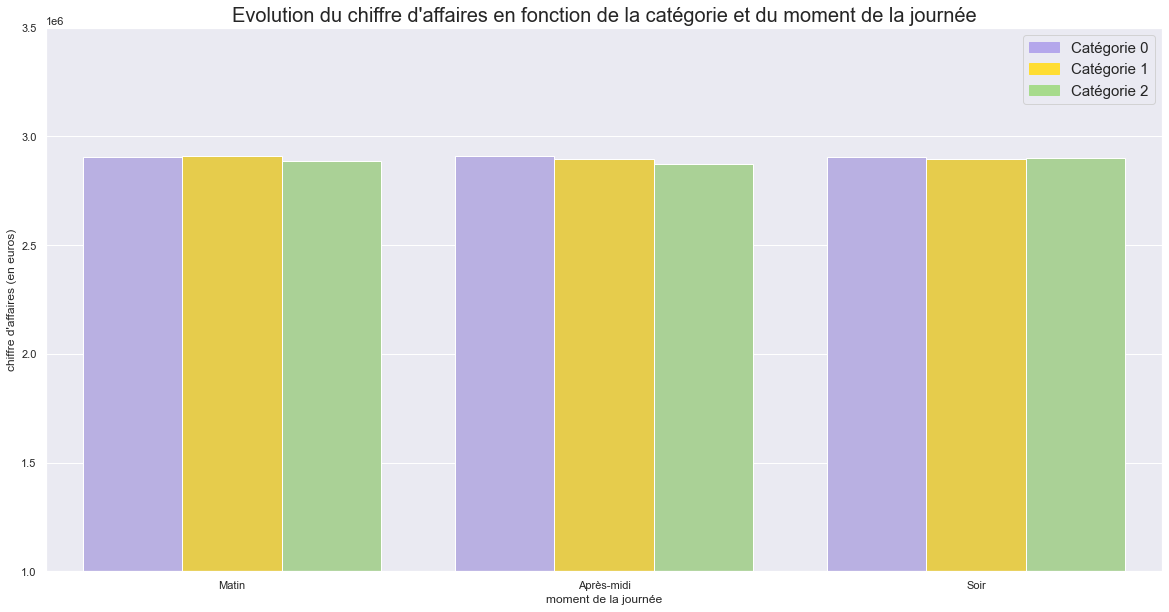

In [25]:
# Evolution chiffre d'affaires en fonction catégorie (moment de la journée) 
sns.set(rc={"figure.figsize":(20,10)})
pal = ["#B4A7EB","#FFDD33","#A7DB8C"]

evol_ca_jour = sns.barplot(x="moment jour",y="CA", 
                           data=ventes, 
                           ci=False,hue="categ", 
                           palette=pal,
                           order=["Matin","Après-midi","Soir"])

plt.title("Evolution du chiffre d'affaires en fonction de la catégorie et du moment de la journée", size=20)

evol_ca_jour.set(xlabel="moment de la journée",ylabel="chiffre d'affaires (en euros)")

categ0 = mpatches.Patch(color="#B4A7EB", label="Catégorie 0")
categ1 = mpatches.Patch(color="#FFDD33", label="Catégorie 1")
categ2 = mpatches.Patch(color="#A7DB8C", label="Catégorie 2")

evol_ca_jour.legend(handles=[categ0,categ1,categ2], prop={"size":15})

plt.ylim(1e6,3.5e6)

plt.savefig("/Users/anissa/09_Evolution du chiffre d'affaires en fonction de la catégorie et du moment de la journée.jpg"
                                                                                                                , dpi=1200)
plt.show()

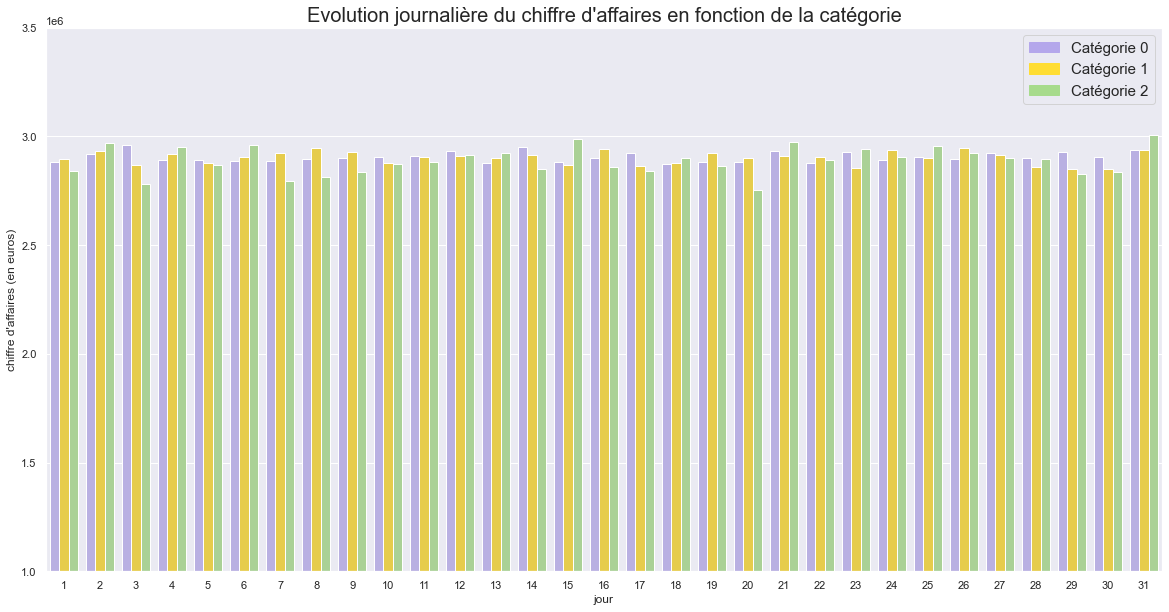

In [26]:
# Evolution chiffre d'affaires en fonction catégorie (jour)
sns.set(rc={"figure.figsize":(20,10)})
pal = ["#B4A7EB","#FFDD33","#A7DB8C"]

evol_ca_journaliere = sns.barplot(x="jour",y="CA", 
                                  data=ventes, 
                                  ci=False,
                                  hue="categ", 
                                  palette=pal)

plt.title("Evolution journalière du chiffre d'affaires en fonction de la catégorie", size=20)

evol_ca_journaliere.set(xlabel="jour",ylabel="chiffre d'affaires (en euros)")

categ0 = mpatches.Patch(color="#B4A7EB", label="Catégorie 0")
categ1 = mpatches.Patch(color="#FFDD33", label="Catégorie 1")
categ2 = mpatches.Patch(color="#A7DB8C", label="Catégorie 2")

evol_ca_journaliere.legend(handles=[categ0,categ1,categ2], prop={"size":15})

plt.ylim(1e6,3.5e6)

plt.savefig("/Users/anissa/10_Evolution journalière du chiffre d'affaires en fonction de la catégorie.jpg", dpi=1200)

plt.show()

***Contribution de la catégorie sur le chiffre d'affaires***

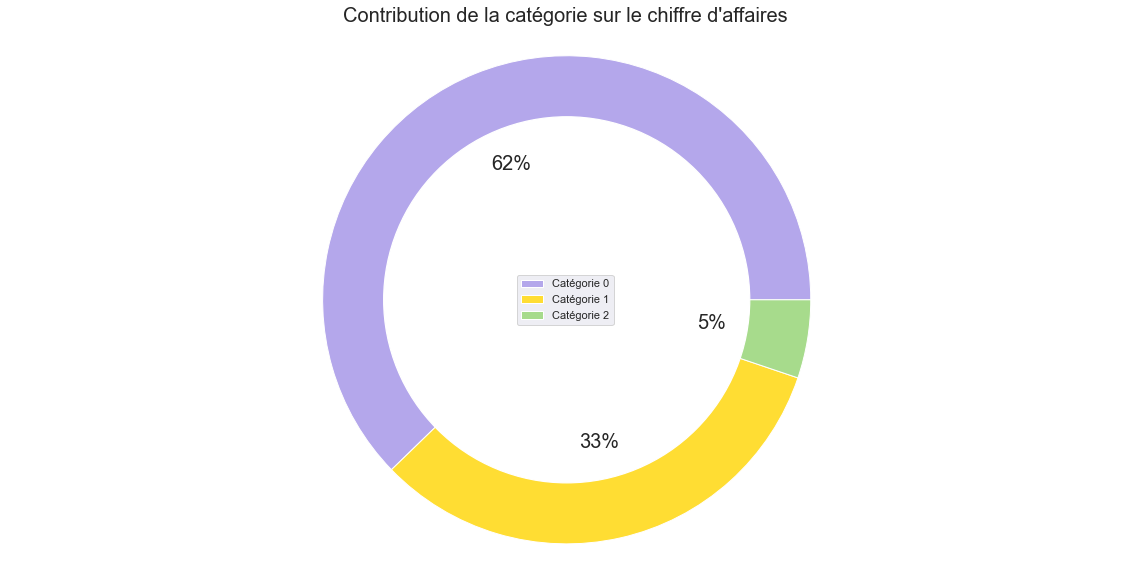

In [27]:
ca_categ = ventes[['categ', 'CA']].groupby('categ').sum().reset_index()

colors = ["#B4A7EB","#FFDD33","#A7DB8C"]
labels = ["Catégorie 0","Catégorie 1","Catégorie 2"]

plt.pie(ca_categ.CA, labels=None, 
        colors=colors,
        autopct='%1.0f%%',
        textprops={'fontsize': 20})
centre_circle = plt.Circle((0,0),0.75, fc="white", linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')

plt.title("Contribution de la catégorie sur le chiffre d'affaires",
                                                      fontsize=(20))

plt.legend(labels,loc="center")

plt.savefig("/Users/anissa/11_Contribution de la catégorie sur le chiffre d'affaires.jpg", dpi=1200)

plt.show()

#### 3.2. Volume des ventes sur la période

##### 3.2.1. Évolution du volume des ventes sur la période

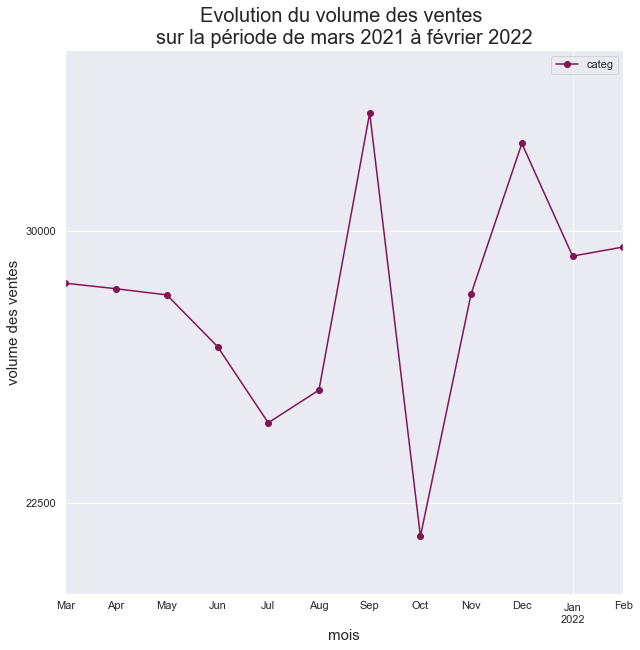

In [28]:
# Evolution du volume sur la période
vol_rl = transacts_produits[["categ","date"]].set_index("date")\
                            .groupby(pd.Grouper(freq="M")).count()
vol_rl.plot(figsize=(10,10),marker="o",
            color="#811453",
            yticks=(15000,22500,30000))
plt.xlabel("mois", size=15)
plt.ylabel("volume des ventes", size=15)

plt.ylim(20000,35000)

plt.title("Evolution du volume des ventes \nsur la période de mars 2021 à février 2022",
                                           fontsize=(20))

plt.savefig("/Users/anissa/12_Evolution du volume des ventes.jpg", dpi=1200)

Remarque : on constate une forte chute des ventes en octobre

***Évolution du volume des ventes en fonction de la catégorie***

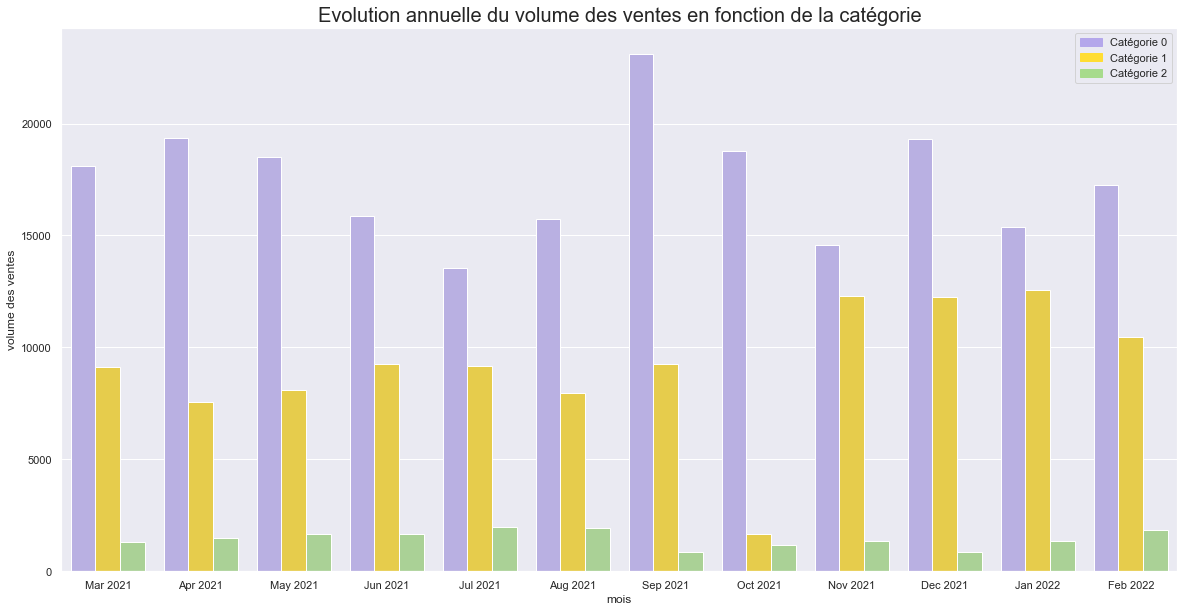

In [29]:
# Evolution volume des ventes en fonction catégorie (annuelle)

my_pal=["#B4A7EB","#FFDD33","#A7DB8C"]

volume_annuel = ventes.groupby(["categ","mois_annee"]).size()\
                        .reset_index(name="volume_annuel")

mois_ordre = ["Mar 2021","Apr 2021", "May 2021", "Jun 2021", "Jul 2021", 
             "Aug 2021", "Sep 2021", "Oct 2021", "Nov 2021", "Dec 2021",
             "Jan 2022", "Feb 2022"]

evol_vol_annuel = sns.barplot(x="mois_annee",y="volume_annuel",
                              data=volume_annuel,
                              palette=my_pal, 
                              ci=False, 
                              hue="categ",
                             order=mois_ordre)

plt.title("Evolution annuelle du volume des ventes en fonction de la catégorie",
                                                                     fontsize=(20))

evol_vol_annuel.set(xlabel="mois",ylabel="volume des ventes")

categ0 = mpatches.Patch(color="#B4A7EB", label="Catégorie 0")
categ1 = mpatches.Patch(color="#FFDD33", label="Catégorie 1")
categ2 = mpatches.Patch(color="#A7DB8C", label="Catégorie 2")

evol_vol_annuel.legend(handles=[categ0,categ1,categ2])

plt.savefig("/Users/anissa/13_Evolution annuelle du volume des ventes en fonction de la catégorie.jpg", dpi=1200)

plt.show()

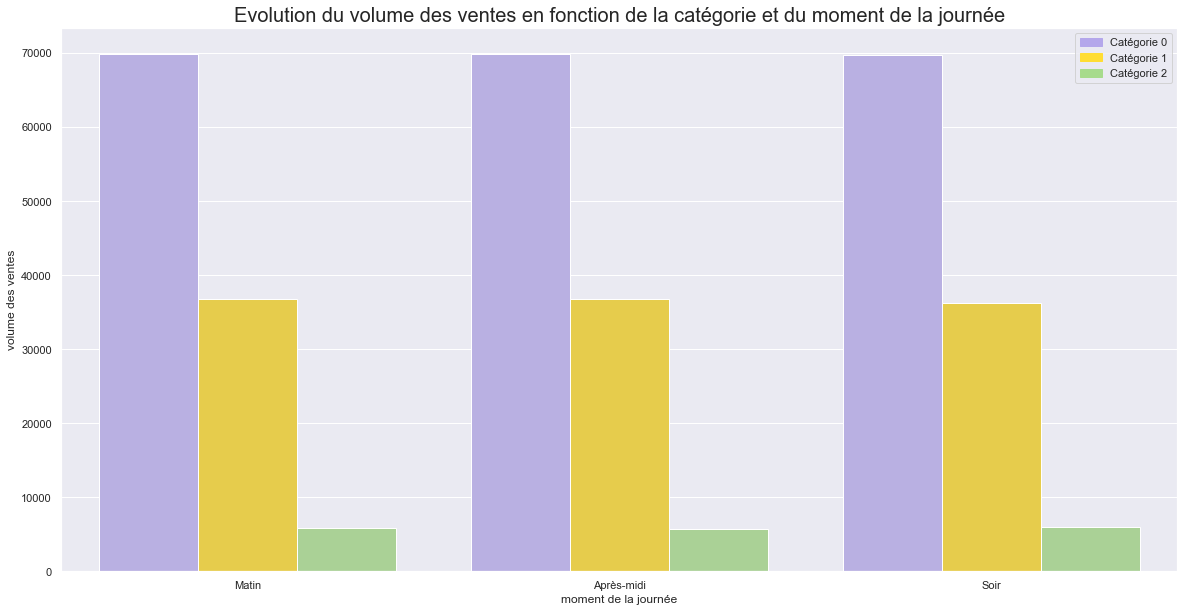

In [30]:
# Evolution volume des ventes en fonction de la catégorie (moment de la journée)

my_pal=["#B4A7EB","#FFDD33","#A7DB8C"]

volume_journee = ventes.groupby(["categ","moment jour"]).size()\
                                .reset_index(name="volume_journee")
evol_vol_journee = sns.barplot(x="moment jour",y="volume_journee",
                               data=volume_journee,
                               palette=my_pal, 
                               ci=False, hue="categ", 
                               order=["Matin","Après-midi","Soir"])

plt.title("Evolution du volume des ventes en fonction de la catégorie et du moment de la journée",
                                                                                    fontsize=(20))

evol_vol_journee.set(xlabel="moment de la journée",ylabel="volume des ventes")

categ0 = mpatches.Patch(color="#B4A7EB", label="Catégorie 0")
categ1 = mpatches.Patch(color="#FFDD33", label="Catégorie 1")
categ2 = mpatches.Patch(color="#A7DB8C", label="Catégorie 2")

evol_vol_journee.legend(handles=[categ0,categ1,categ2])

plt.savefig("/Users/anissa/14_Evolution du volume des ventes en fonction de la catégorie et du moment de la journée.jpg", 
                                                                                                                dpi=1200)
plt.show()

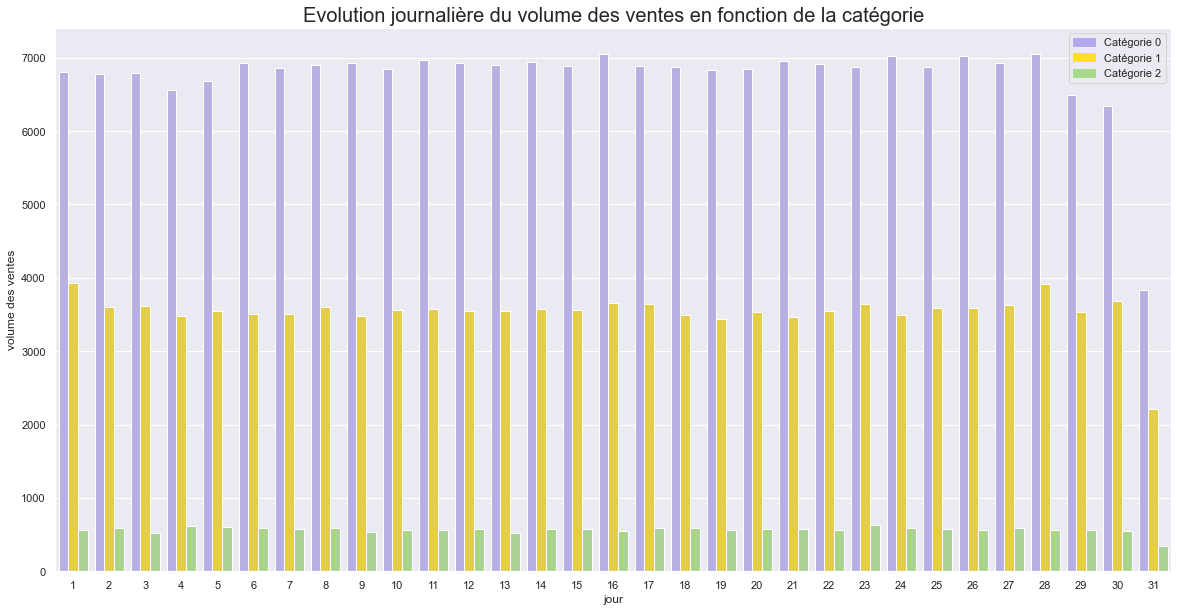

In [31]:
# Evolution volume des ventes en fonction de la catégorie (jour)
my_pal=["#B4A7EB","#FFDD33","#A7DB8C"]

volume_jour = ventes.groupby(["categ","jour"]).size()\
                            .reset_index(name="volume_jour")
evol_vol_jour = sns.barplot(x="jour",y="volume_jour",
                            data=volume_jour,
                            palette=my_pal, 
                            ci=False,
                            hue="categ")

plt.title("Evolution journalière du volume des ventes en fonction de la catégorie",
                                                                    fontsize=(20))

evol_vol_jour.set(xlabel="jour",ylabel="volume des ventes")

categ0 = mpatches.Patch(color="#B4A7EB", label="Catégorie 0")
categ1 = mpatches.Patch(color="#FFDD33", label="Catégorie 1")
categ2 = mpatches.Patch(color="#A7DB8C", label="Catégorie 2")

evol_vol_jour.legend(handles=[categ0,categ1,categ2])

plt.savefig("/Users/anissa/15_Evolution journalière du volume des ventes en fonction de la catégorie.jpg", 
                                                                                                dpi=1200)
plt.show()

***Contribution des catégories sur le volume des ventes***

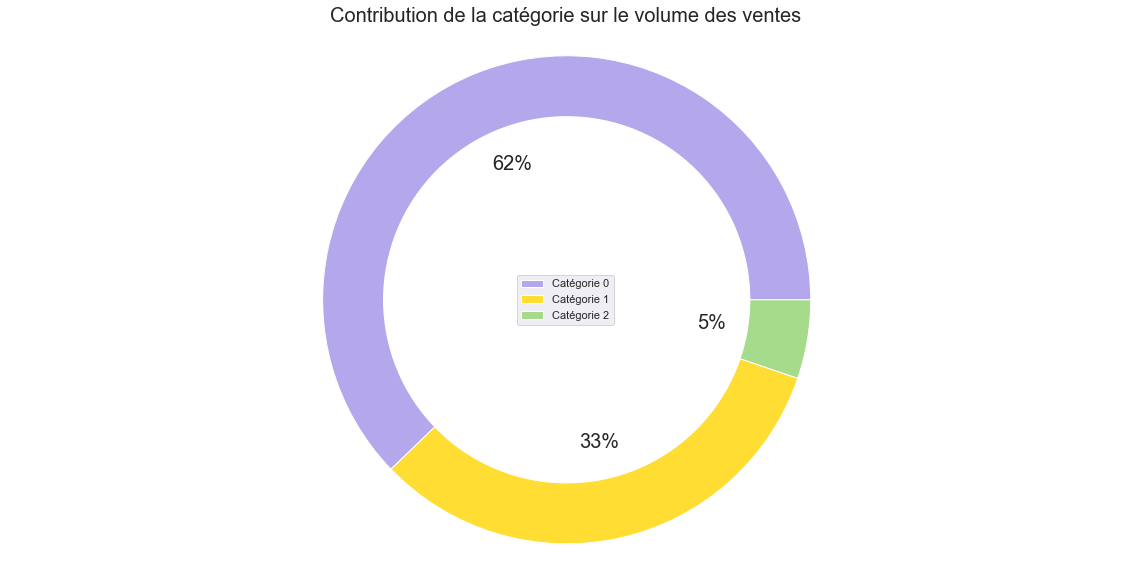

In [32]:
# Contribution des categories sur le volume des ventes
volume_cat = ventes.groupby(["categ","mois"]).size().reset_index(name="volume")
volume_categ = volume_cat[["categ","volume"]].groupby("categ").sum()\
                                                        .reset_index()

colors = ["#B4A7EB","#FFDD33","#A7DB8C"]
labels = ["Catégorie 0","Catégorie 1","Catégorie 2"]

plt.pie(volume_categ.volume, labels=None, 
        colors=colors,
        autopct='%1.0f%%',
        textprops={'fontsize': 20})
centre_circle = plt.Circle((0,0),0.75, fc="white", linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')

plt.title('Contribution de la catégorie sur le volume des ventes',
                                                      fontsize=(20))

plt.legend(labels,loc="center")

plt.savefig("/Users/anissa/16_Contribution de la catégorie sur le volume des ventes.jpg", dpi=1200)

plt.show()

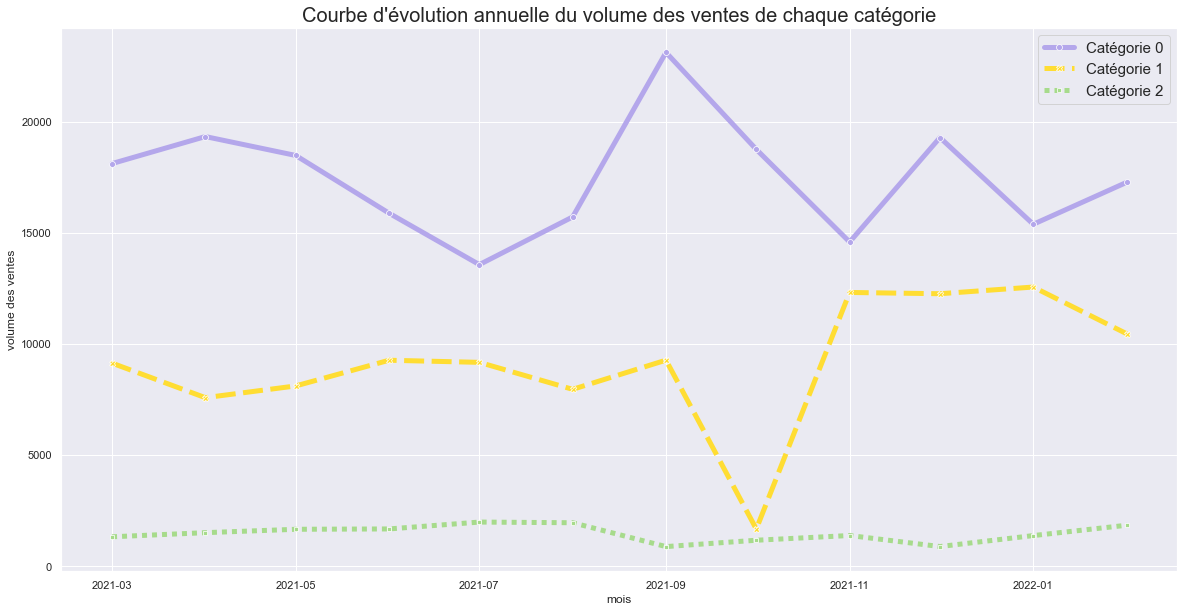

In [33]:
# Courbe évolution volume des ventes en fonction des catégories
ventes.mois_annee=pd.to_datetime(ventes.mois_annee)
volume_categories = ventes.groupby(["categ","mois_annee"]).size()\
                                    .reset_index(name="volume")

courbe_evol_volume = sns.lineplot(x="mois_annee",y="volume",
                                  data=volume_categories,
                                  palette=my_pal, 
                                  ci=False, 
                                  hue="categ", 
                                  style="categ",
                                  markers=True, 
                                  linewidth=5,
                                 sort= False)

labels = ["Catégorie 0","Catégorie 1","Catégorie 2"]

courbe_evol_volume.set(xlabel="mois",ylabel="volume des ventes")

plt.title("Courbe d'évolution annuelle du volume des ventes de chaque catégorie",
                                                                  fontsize=(20))

plt.legend(labels,loc="best", prop={"size":15})

plt.savefig("/Users/anissa/17_Courbe d'évolution annuelle du volume des ventes de chaque catégorie.jpg", 
                                                                                                dpi=1200)
plt.show()

Remarque : on constate une forte baisse de la catégorie 1 au mois d'octobre

#### 3.3. **Focus sur le mois d'octobre** - Analyse de la baisse du chiffres et du volume des ventes

##### 3.3.1. Taux d'évolution du chiffre d'affaires entre septembre et octobre

In [34]:
# Taux d'évolution 

ca_sep = ventes.loc[ventes["mois"]==9, "price"].sum()
ca_oct = ventes.loc[ventes["mois"]==10, "price"].sum()

tx_evol_oct = (ca_oct-ca_sep)/ca_sep

print("Le taux d'évolution est de",round(tx_evol_oct,2)*100,"%, ce qui signifie que le chiffre d'affaires a diminué de 37% entre septembre et octobre")

Le taux d'évolution est de -37.0 %, ce qui signifie que le chiffre d'affaires a diminué de 37% entre septembre et octobre


##### 3.3.2. Taux d'évolution du volume des ventes entre septembre et octobre

In [35]:
# Taux d'évolution

volume_taux = volume_categories.set_index(["mois_annee"])
vol_sep = volume_taux.loc["2021-9", "volume"].sum()
vol_oct = volume_taux.loc["2021-10", "volume"].sum()

tx_evol_oct_vol = (vol_oct-vol_sep)/vol_sep

print("Le taux d'évolution est de",round(tx_evol_oct_vol,2)*100,"%, ce qui signifie que les ventes ont diminué de 35% entre septembre et octobre")

Le taux d'évolution est de -35.0 %, ce qui signifie que les ventes ont diminué de 35% entre septembre et octobre


##### 3.3.3. Ventes du mois de septembre

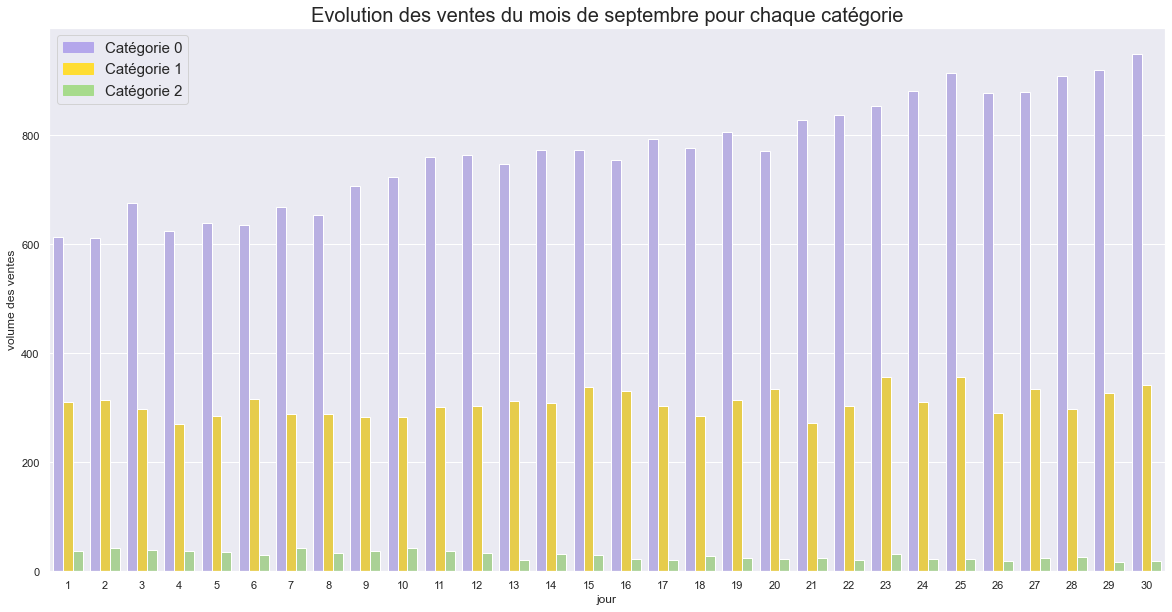

(0.0, 1000.0)

In [36]:
vol_jour = ventes.groupby(["categ","jour","mois"]).size()\
                                    .reset_index(name="volume")
ventes_sept = vol_jour.loc[vol_jour.mois==9,["categ","jour","volume"]]

labels = ["Catégorie 0","Catégorie 1","Catégorie 2"]
my_pal=["#B4A7EB","#FFDD33","#A7DB8C"]
sns.set(rc={"figure.figsize":(20,10)})

ventes_septembre = sns.barplot(x="jour",y="volume", 
                               data=ventes_sept, 
                               ci=False,
                               hue="categ",
                               palette=my_pal)

plt.title("Evolution des ventes du mois de septembre pour chaque catégorie",
                                                            fontsize=(20))

ventes_septembre.set(xlabel="jour",ylabel="volume des ventes")

categ0 = mpatches.Patch(color="#B4A7EB", label="Catégorie 0")
categ1 = mpatches.Patch(color="#FFDD33", label="Catégorie 1")
categ2 = mpatches.Patch(color="#A7DB8C", label="Catégorie 2")
ventes_septembre.legend(handles=[categ0,categ1,categ2], prop={"size":15})

plt.savefig("/Users/anissa/18_Evolution des ventes du mois de septembre.jpg", 
                                                                    dpi=1200)
plt.show()

ventes_septembre.set_ylim(0,1000)

##### 3.3.4. Ventes du mois d'octobre

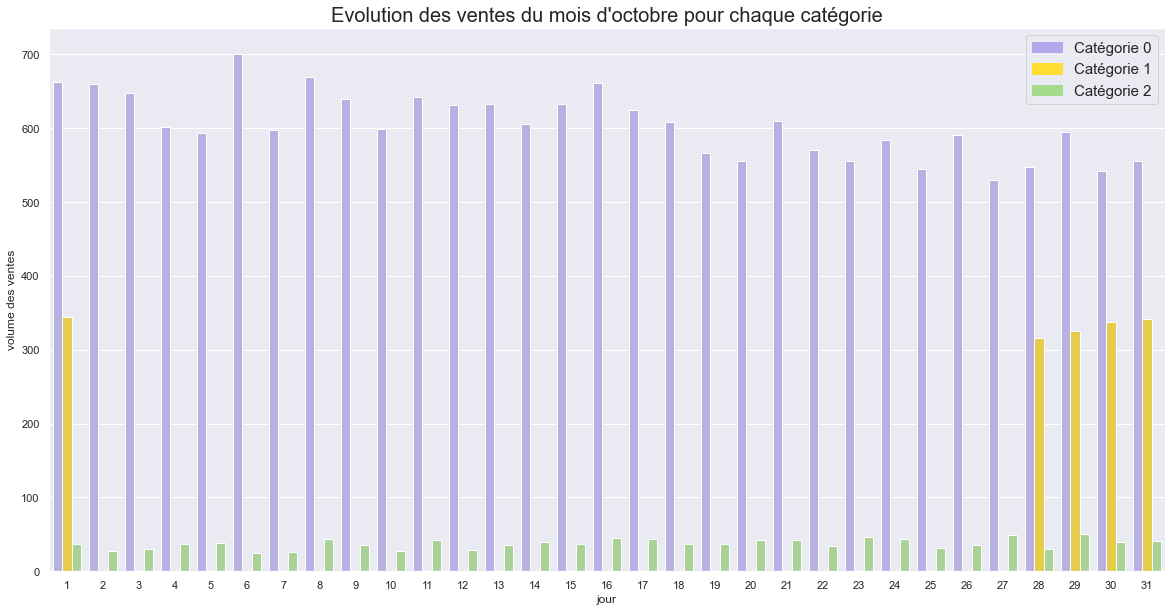

(0.0, 800.0)

In [37]:
vol_jour = ventes.groupby(["categ","jour","mois"]).size()\
                                        .reset_index(name="volume")
ventes_oct = vol_jour.loc[vol_jour.mois==10,["categ","jour","volume"]]

my_pal=["#B4A7EB","#FFDD33","#A7DB8C"]
sns.set(rc={"figure.figsize":(20,10)})

ventes_octobre = sns.barplot(x="jour",y="volume", 
                             data=ventes_oct, 
                             ci=False,
                             hue="categ",
                             palette=my_pal)

plt.title("Evolution des ventes du mois d'octobre pour chaque catégorie",
                                                            fontsize=(20))

ventes_octobre.set(xlabel="jour",ylabel="volume des ventes")

categ0 = mpatches.Patch(color="#B4A7EB", label="Catégorie 0")
categ1 = mpatches.Patch(color="#FFDD33", label="Catégorie 1")
categ2 = mpatches.Patch(color="#A7DB8C", label="Catégorie 2")
ventes_octobre.legend(handles=[categ0,categ1,categ2], prop={"size":15})

plt.savefig("/Users/anissa/19_Evolution des ventes du mois d'octobre.jpg", 
                                                                dpi=1200)
plt.show()

ventes_octobre.set_ylim(0,800)

Remarque : il n'y a eu aucune vente pour la catégorie 1 entre le 2 octobre et 27 octobre. Les ventes étant constantes chaque mois, on peut conclure qu'il y a une *perte de données*.

##### 3.3.5. Ventes du mois de novembre

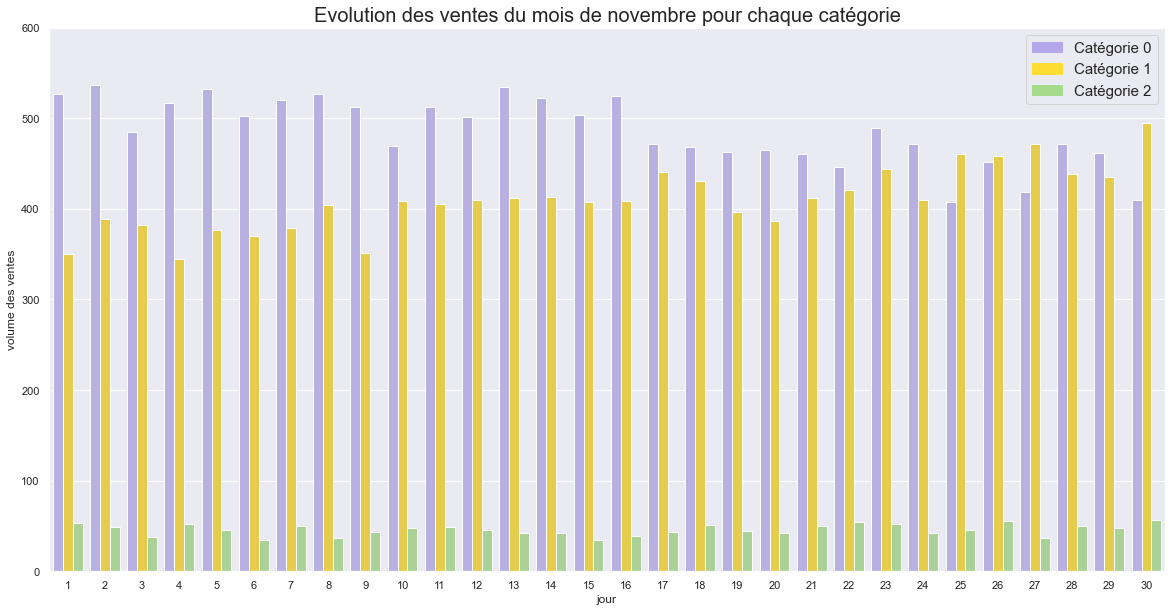

In [38]:
vol_jour = ventes.groupby(["categ","jour","mois"]).size()\
                                        .reset_index(name="volume")
ventes_nov = vol_jour.loc[vol_jour.mois==11,["categ","jour","volume"]]

my_pal=["#B4A7EB","#FFDD33","#A7DB8C"]
sns.set(rc={"figure.figsize":(20,10)})

ventes_novembre = sns.barplot(x="jour",y="volume", 
                              data=ventes_nov, 
                              ci=False,
                              hue="categ",
                              palette=my_pal)

plt.title("Evolution des ventes du mois de novembre pour chaque catégorie",
                                                            fontsize=(20))

ventes_novembre.set(xlabel="jour",ylabel="volume des ventes")

categ0 = mpatches.Patch(color="#B4A7EB", label="Catégorie 0")
categ1 = mpatches.Patch(color="#FFDD33", label="Catégorie 1")
categ2 = mpatches.Patch(color="#A7DB8C", label="Catégorie 2")
ventes_novembre.legend(handles=[categ0,categ1,categ2], prop={"size":15})

ventes_novembre.set_ylim(0,600)

plt.savefig("/Users/anissa/20_Evolution des ventes du mois de novembre.jpg", dpi=1200)

plt.show()

#### 3.4. Analyse sans les données du mois d'octobre

*Pour ne pas fausser la suite de notre analyse, les données du mois d'octobre seront **supprimées***.

##### 3.4.1. Création des df

In [39]:
ventes_sans_oct = ventes[(ventes['session_date'].dt.month != 10)]
rester_livres_sans_oct = rester_livres.loc[rester_livres["mois"]!=10]
transacts_sans_oct = transacts_produits[(transacts_produits['date'].dt.month != 10)]

##### 3.4.2. Coubre d'évolution du chiffre d'affaires

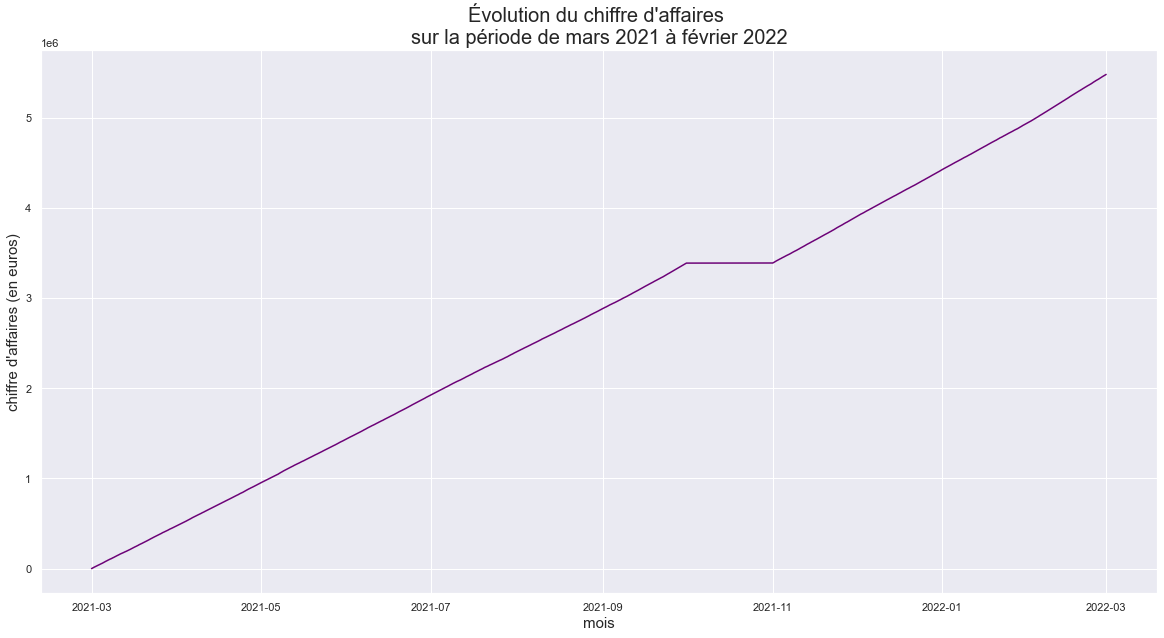

In [40]:
df = transacts_sans_oct[['date', 'price']]
df = df.sort_values('date').reset_index()
df['ca'] = np.cumsum(df.price)

plt.plot(df['date'], df['ca'], color="#6C0277")
plt.xlabel("mois", size=15)
plt.ylabel("chiffre d'affaires (en euros)", size=15)

plt.title("Évolution du chiffre d'affaires \nsur la période de mars 2021 à février 2022", size=20)

plt.savefig("/Users/anissa/21_Evolution du chiffre d'affaires.jpg", 
                                                        dpi=1200)
plt.show()

On constate que le chiffre d'affaires est en **augmentation constante** sur l'année.

##### 3.4.3. Coubre d'évolution du volume des ventes en fonction des catégories

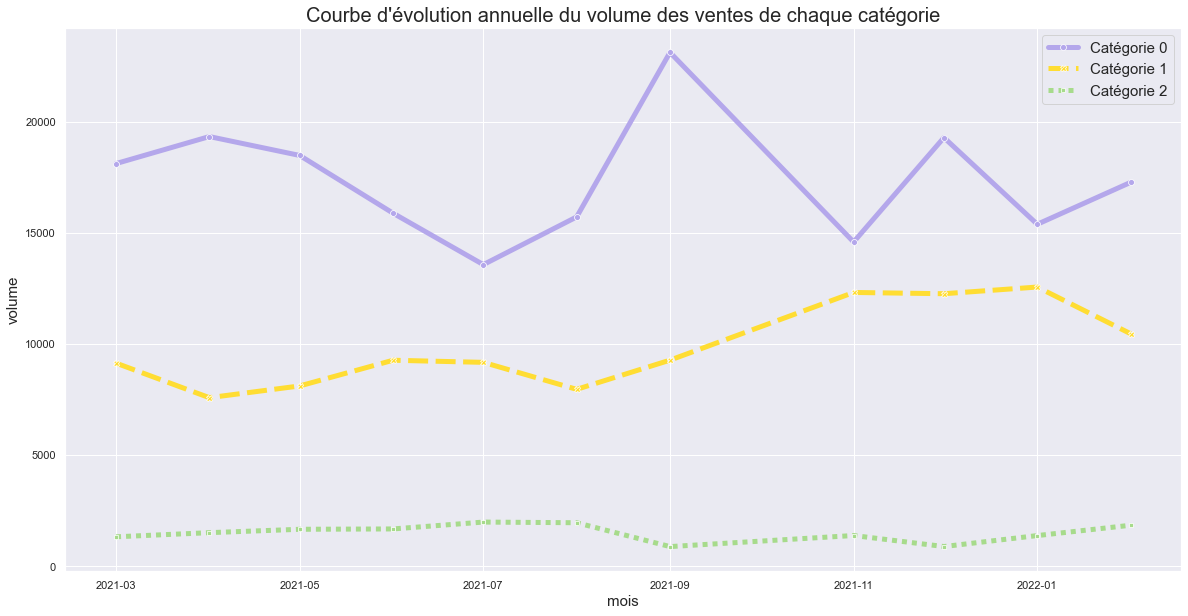

In [41]:
ventes_sans_octobre = ventes_sans_oct.copy()
ventes_sans_octobre.mois_annee =pd.to_datetime(ventes_sans_oct.mois_annee)
vol_categories = ventes_sans_octobre.groupby(["categ","mois_annee"]).size()\
                                    .reset_index(name="volume")

line_evol_volume = sns.lineplot(x="mois_annee",y="volume",
                                  data=vol_categories,
                                  palette=my_pal, 
                                  ci=False, 
                                  hue="categ", 
                                  style="categ",
                                  markers=True, 
                                  linewidth=5)

labels = ["Catégorie 0","Catégorie 1","Catégorie 2"]

courbe_evol_volume.set(xlabel="mois",ylabel="volume des ventes")

plt.title("Courbe d'évolution annuelle du volume des ventes de chaque catégorie",
                                                                  fontsize=(20))
plt.xlabel("mois", size=15)
plt.ylabel("volume", size=15)

plt.legend(labels,loc="best", prop={"size":15})

plt.savefig("/Users/anissa/22_Courbe d'évolution annuelle du volume des ventes de chaque catégorie.jpg", 
                                                                                                dpi=1200)
plt.show()

##### 3.4.4. Calculs de taux d'évolution

In [42]:
# Chiffre d'affaires global
ca_mars = ventes_sans_oct.loc[ventes_sans_oct["mois"]==3, "price"].sum()
ca_fev = ventes_sans_oct.loc[ventes_sans_oct["mois"]==2, "price"].sum()

taux_ca_total = (ca_fev-ca_mars)/ca_fev*100 

print("Taux d'évolution du CA : ", round(taux_ca_total,2), "%")

# Baisse en été
ca_mai = ventes_sans_oct.loc[ventes_sans_oct["mois"]==5, "price"].sum()
ca_juillet = ventes_sans_oct.loc[ventes_sans_oct["mois"]==7, "price"].sum()

taux_ca_ete = (ca_juillet-ca_mai)/ca_mai*100

print("Baisse du CA en été : ", round(taux_ca_ete,2), "%")

# Pic pour la rentrée scolaire
ca_aout = ventes_sans_oct.loc[ventes_sans_oct["mois"]==8, "price"].sum()
ca_sept = ventes_sans_oct.loc[ventes_sans_oct["mois"]==9, "price"].sum()

taux_ca_rentree = (ca_sept-ca_aout)/ca_aout*100 

print("Pic pour la rentrée scolaire : ", round(taux_ca_rentree,2), "%")

# Pic fin d'année
ca_nov = ventes_sans_oct.loc[ventes_sans_oct["mois"]==11, "price"].sum()
ca_dec = ventes_sans_oct.loc[ventes_sans_oct["mois"]==12, "price"].sum()

taux_ca_fetes = (ca_dec-ca_nov)/ca_nov*100

print("Pic pour les fêtes de fin d'année : ", round(taux_ca_fetes,2), "%")

Taux d'évolution du CA :  10.03 %
Baisse du CA en été :  -1.74 %
Pic pour la rentrée scolaire :  4.9 %
Pic pour les fêtes de fin d'année :  1.95 %


#### 3.4. Prix en fonction du chiffre d'affaires

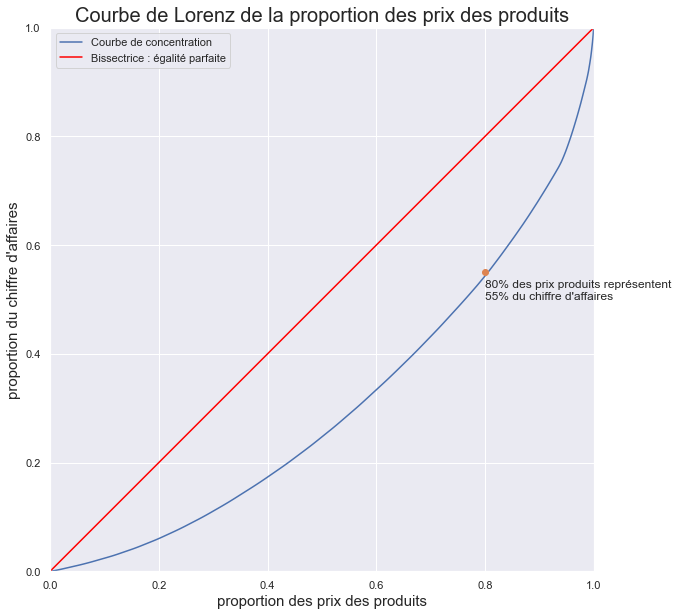

L'indice de Gini est: 0.38996846541136054


In [43]:
# Représentation graphique : courbe de Lorenz

prix = ventes_sans_oct['price'].values

lorenz = np.cumsum(np.sort(prix)) / prix.sum()
lorenz = np.append([0], lorenz)

plt.figure(figsize=(10,10))
plt.plot(np.linspace(0, 1, len(lorenz)), lorenz, drawstyle = 'steps-post')

plt.gca().set_aspect('equal', adjustable = 'box')
labels =['Courbe de concentration', 'Bissectrice : égalité parfaite']

x = [0, 1]
y = [0, 1]

plt.plot(x, y, 'red')
plt.ylabel("proportion du chiffre d'affaires", size=15)
plt.xlabel("proportion des prix des produits", size=15)


plt.ylim(0, 1)
plt.xlim(0, 1)

plt.title('Courbe de Lorenz de la proportion des prix des produits', fontsize=(20))
plt.legend(labels)

plt.plot(0.8, 0.55, 'o')
plt.text(0.8, 0.50 , "80% des prix produits représentent \n55% du chiffre d\'affaires", 
                                                                     fontsize = '12')

plt.savefig("/Users/anissa/23_Courbe de lorenz de la proportion des prix des produits.jpg", 
                                                                                    dpi=1200)
plt.show()

aire_courbe = lorenz[:-1].sum() / len(lorenz)

S = 0.5 - aire_courbe
gini = 2 * S
print('L\'indice de Gini est:', gini)

_Bissectrice = représente l'égalité parfaite avec un indice de Gini de 0._

#### 3.5. Contribution des catégories d'âge sur le chiffre d'affaires

In [44]:
# Création tranche d'âge
def tranche_age(age):
    tranches = [
        {'bornes': (0,18), 'label': '18-'},
        {'bornes': (19,30), 'label': '19-30'},
        {'bornes': (31,50), 'label': '31-50'},
        {'bornes': (51,70), 'label': '51-70'},
        {'bornes': (71,120),'label': '71+'}
    ]
    for t in tranches:
        if t['bornes'][0] <= age <= t['bornes'][1]:
            return t['label']
        
clients['tranche_age'] = clients['age'].apply(tranche_age)
clients.head()

client_id sex  birth  age tranche_age
0    c_4410   f   1967   55       51-70
1    c_7839   f   1975   47       31-50
2    c_1699   f   1984   38       31-50
3    c_5961   f   1962   60       51-70
4    c_5320   m   1943   79         71+

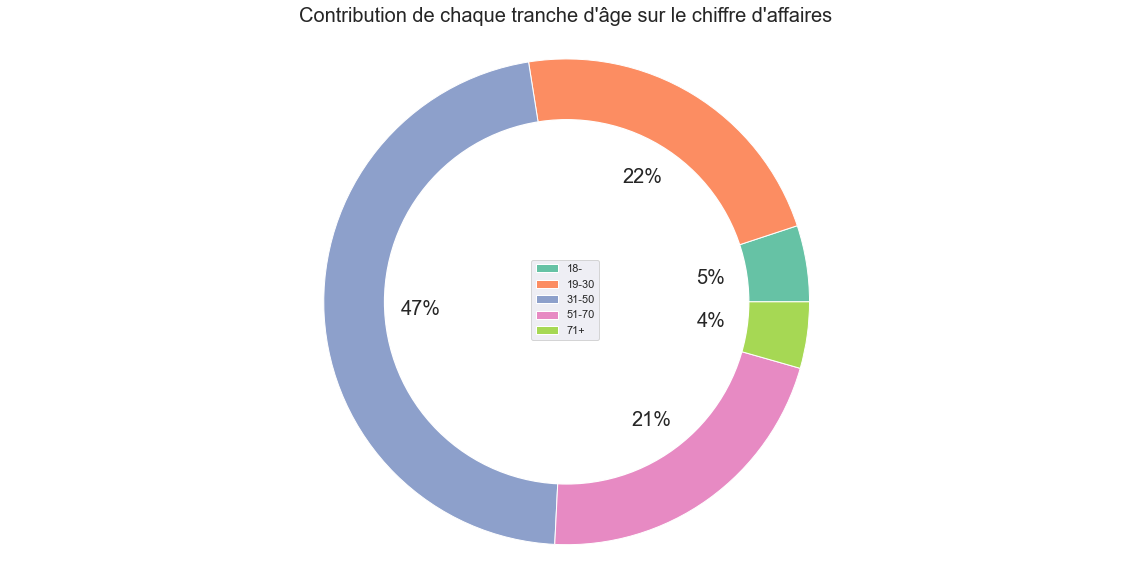

In [45]:
# Représentation graphique : diagramme

ca_age = rester_livres_sans_oct[['tranche_age', 'price']].groupby('tranche_age')\
                                                    .sum().reset_index()

sns.set_palette('Set2')
labels = ["18-","19-30","31-50","51-70","71+"]

plt.pie(ca_age.price, labels=None,
        autopct='%1.0f%%',
        textprops={'fontsize': 20})

centre_circle = plt.Circle((0,0),0.75, fc="white", linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')

plt.legend(labels, loc="center")

plt.title("Contribution de chaque tranche d'âge sur le chiffre d'affaires",
                                                        fontsize=(20))

plt.savefig("/Users/anissa/24_Contribution de chaque tranche d'âge sur le chiffre d'affaires.jpg", 
                                                                                        dpi=1200)

-----

### 4. Fidélité et satisfaction des clients

#### 4.1. Fidélité client

##### 4.1.1. Clients les plus fidèles - clients grands comptes

In [46]:
# Localisation des clients achetant le plus (clients grands comptes)
outliers = rester_livres_sans_oct.groupby("client_id").count()
outliers.sort_values(by="id_prod", inplace=True)

outliers.tail()

id_prod   date  session_id  price  categ    sex  birth    age  \
client_id                                                                  
c_8026         184    184         184    184    184    184    184    184   
c_4958        2457   2457        2457   2457   2457   2457   2457   2457   
c_3454        3139   3139        3139   3139   3139   3139   3139   3139   
c_6714        4189   4189        4189   4189   4189   4189   4189   4189   
c_1609       11839  11839       11839  11839  11839  11839  11839  11839   

           tranche_age   jour   mois  heure  moment jour  
client_id                                                 
c_8026             184    184    184    184          184  
c_4958            2457   2457   2457   2457         2457  
c_3454            3139   3139   3139   3139         3139  
c_6714            4189   4189   4189   4189         4189  
c_1609           11839  11839  11839  11839        11839

Remarque : On constate que 4 clients ont acheté entre 2457 et 11839 fois sur le site

In [47]:
# On crée un df contenant leurs données
grands_comptes = rester_livres_sans_oct[(rester_livres_sans_oct['client_id'] == 'c_1609') |
      (rester_livres_sans_oct['client_id'] == 'c_6714') |
      (rester_livres_sans_oct['client_id'] == 'c_3454') |
      (rester_livres_sans_oct['client_id'] == 'c_4958')]

grands_comptes.head()

id_prod        date session_id client_id  price  categ sex  birth  age  \
62   0_1420  2021 11 23   s_123928    c_1609  11.53    0.0   m   1980   42   
64    1_281  2021 12 01   s_127578    c_1609  23.99    1.0   m   1980   42   
83   0_1579  2021 05 03    s_29458    c_1609   3.99    0.0   m   1980   42   
99    1_414  2022 02 23   s_169492    c_1609  23.83    1.0   m   1980   42   
101  0_1163  2021 06 24    s_52929    c_1609   9.99    0.0   m   1980   42   

    tranche_age  jour  mois  heure moment jour  
62        31-50    23    11     15  Après-midi  
64        31-50     1    12      1        Soir  
83        31-50     3     5     19  Après-midi  
99        31-50    23     2      5        Soir  
101       31-50    24     6      3        Soir

***Contribution sur le chiffre d'affaires en fonction de l'âge***

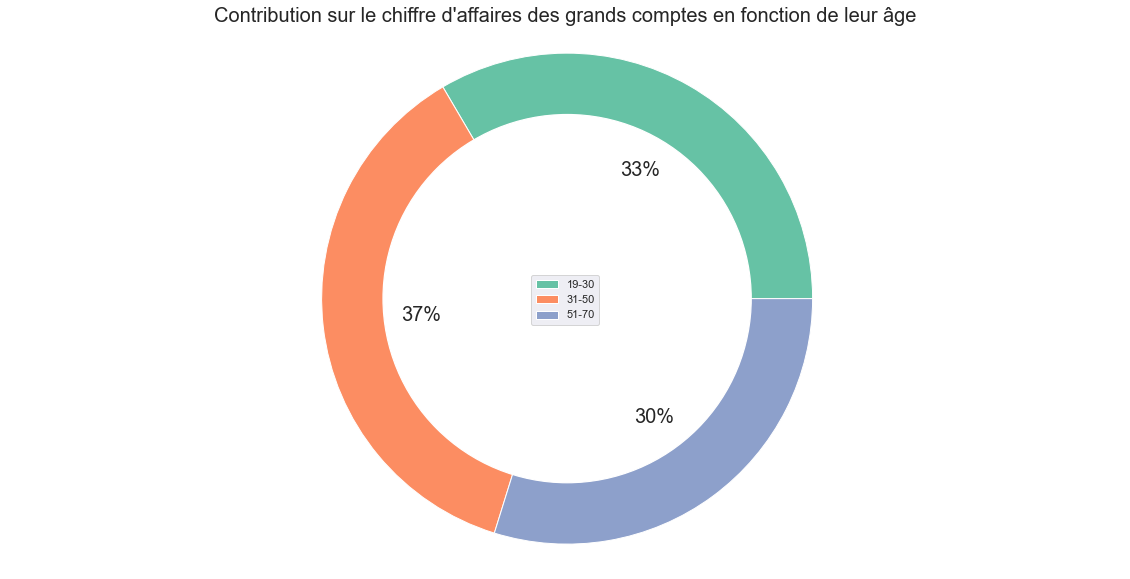

In [48]:
gc_age = grands_comptes[['tranche_age', 'price']].groupby('tranche_age')\
                                                        .sum().reset_index()

sns.set_palette('Set2')
labels = ["19-30","31-50","51-70"]

plt.pie(gc_age.price, labels=None,
        autopct='%1.0f%%',
        textprops={'fontsize': 20})

centre_circle = plt.Circle((0,0),0.75, fc="white", linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')

plt.legend(labels, loc="center")

plt.title("Contribution sur le chiffre d'affaires des grands comptes en fonction de leur âge",
          fontsize=(20))

plt.savefig("/Users/anissa/25_Contribution sur le chiffre d'affaires des grands comptes en fonction de leur âge.jpg", 
                                                                                                            dpi=1200)

In [49]:
# Année de naissance des clients les plus fidèles
grands_comptes.birth.unique()

array([1980, 1968, 1969, 1999])

Hypothèse : Ils sont nés entre 1968 et 1999. Il pourrait s'agir de libraires/professeurs/bibliothécaires/journalistes critique littéraire mais aussi d'étudiant en littérature (pour le plus jeune).  
Proposition : accompagnement spécifique et personnalisé pour chacun (au-delà de l'algorithme)

***Contribution sur le chiffre d'affaires et le volume des ventes***

In [50]:
# Calcul de leur contribution au chiffre d'affaires et volume de ventes
part_gc_ca = ((grands_comptes["price"].sum()
                  / ChiffreAffaires.sum())*100)
part_gc_volume = ((grands_comptes["id_prod"].count()
                  /rester_livres_sans_oct["id_prod"].count())*100)

print("Les clients ayant effectué le plus d'achats sur le site représentent",round(part_gc_ca,2).values[0],"% du chiffre d'affaires et",round(part_gc_volume),"% du volume des ventes.")

Les clients ayant effectué le plus d'achats sur le site représentent 7.07 % du chiffre d'affaires et 7 % du volume des ventes.


In [51]:
# Montant total dépensé par les grands comptes
grands_comptes.price.sum()

410025.987312

>> Les clients grands comptes représentent à eux tout seuls 7,07% du chiffre d'affaires et 7% du volume des ventes soit une dépense totale de 433947€ sur la période.

#### 4.2. Fidélité des clients envers une catégorie

In [52]:
df = ventes_sans_oct[['client_id', 'categ']].copy()
df['count'] = 1 # count the frequency that a value occurs in a dataframe

df = pd.pivot_table(df, columns='categ', 
                    index='client_id', aggfunc='count').reset_index()
df.columns = ['client_id', 'cat0', 'cat1', 'cat2']

df = df.fillna(0)
df['cat_fidele'] = (df.loc[:,'cat0':'cat2'].max(axis=1) 
                            / df.loc[:,'cat0':'cat2'].sum(axis=1))
df.head()

client_id  cat0  cat1  cat2  cat_fidele
0       c_1  14.0   4.0   1.0    0.736842
1      c_10  10.0  17.0   1.0    0.607143
2     c_100   2.0   3.0   1.0    0.500000
3    c_1000  19.0  34.0   0.0    0.641509
4    c_1001  37.0  14.0   1.0    0.711538

In [53]:
fidele_cat = df.cat_fidele.mean()
fidele_cat*100

65.35078970833383

En moyenne, 65% des produits achetés par un client proviennent de la même catégorie.
Idées :  
* Up-selling
* Proposer d'autres catégories de livres dans les suggestions

#### 4.3. Satisfaction client

Pour calculer la satisfaction client, on peut s'appuyer sur le taux de réachat. Il correspond au pourcentage de clients ayant procédé au moins à un nouvel achat ("rachat") au moins sur une période donnée.

##### 4.3.1. Taux de rachat

In [54]:
# On agrège le nombre d'achat par mois par client

rachat = rester_livres_sans_oct[["client_id","age","tranche_age","id_prod","mois"]] # sélection des colonnes dont on a besoin

# Nombre d'achat par mois
rachat = rachat.groupby(["client_id","mois"])\
                    .agg({"id_prod":"count"})\
                    .rename(columns={"id_prod":"total_achat"})\
                    .reset_index()
rachat.head() # nombre d'achat par mois par client

client_id  mois  total_achat
0       c_1     2            1
1       c_1     6            1
2       c_1     7            4
3       c_1     8            1
4       c_1     9            2

In [55]:
# On regroupe pour obtenir les données pour chaque client unique
rachat_client = rachat.groupby("client_id").nunique()
rachat_client.head()

mois  total_achat
client_id                   
c_1           7            5
c_10          8            6
c_100         3            3
c_1000       11            7
c_1001        8            7

In [56]:
# On sélectionne les personnes qui ont effectué au moins 2 achats
satisfaction_client = rachat_client.loc[rachat_client["total_achat"]>=2]

print("Le nombre de personnes ayant effectué au moins un nouvel achat est de",satisfaction_client.shape[0])

Le nombre de personnes ayant effectué au moins un nouvel achat est de 8285


In [57]:
# Calcul du taux de rachat
taux_rachat = (satisfaction_client.shape[0]/clients.shape[0])*100

print(round(taux_rachat,2),"% des clients ont effectué un nouvel achat sur la période.")

96.1 % des clients ont effectué un nouvel achat sur la période.


##### 4.3.2. Fréquence d'achat à l'année

In [58]:
# Fréquence d'achat à l'année
freq_achat = rachat_client.total_achat.mean()
print("Les clients effectuent en moyenne", round(freq_achat,2), "achats sur l'année.")

Les clients effectuent en moyenne 4.73 achats sur l'année.


##### 4.3.3. Churn rate / taux d'attrition (absence de nouvel achat)

In [59]:
tx_churn = 100-taux_rachat
print(round(tx_churn,2),"% des clients n'effectuent pas de nouvel achat dans l'année")

3.9 % des clients n'effectuent pas de nouvel achat dans l'année


In [60]:
clients_perdus = rachat_client.loc[rachat_client["total_achat"]<=1]
clients_perdus.head() # 266 clients n'ont pas effectué de nouvel achat sur l'année

mois  total_achat
client_id                   
c_106         6            1
c_1069        2            1
c_1141        1            1
c_1159        3            1
c_1210        3            1

----

### 5. Panier moyen

Afin de ne pas fausser les résultats, nous allons analyser les données des clients les plus fidèles à part.

In [61]:
# Création du df sans les grands comptes
sans_gc = (rester_livres_sans_oct[(rester_livres_sans_oct['client_id'] != 'c_1609') 
                        & (rester_livres_sans_oct['client_id'] != 'c_6714') 
                          & (rester_livres_sans_oct['client_id'] != 'c_3454')
                              & (rester_livres_sans_oct['client_id'] != 'c_4958')])

sans_gc.head()

id_prod        date session_id client_id  price  categ sex  birth  age  \
0  0_1483  2021 04 10    s_18746    c_4450   4.99    0.0   f   1977   45   
1   2_226  2022 02 03   s_159142     c_277  65.75    2.0   f   2000   22   
2   1_374  2021 09 23    s_94290    c_4270  10.71    1.0   f   1979   43   
4  0_1351  2021 07 17    s_63642    c_1242   8.99    0.0   f   1980   42   
5  0_1085  2021 09 15    s_90139    c_2526   3.99    0.0   f   1982   40   

  tranche_age  jour  mois  heure moment jour  
0       31-50    10     4     18  Après-midi  
1       19-30     3     2      1        Soir  
2       31-50    23     9     15  Après-midi  
4       31-50    17     7     20  Après-midi  
5       31-50    15     9      5        Soir

#### 5.1. Clients lambda

##### 5.1.1. Calcul du panier moyen

In [62]:
panier_moyen = sans_gc.groupby(["session_id"])\
                        .agg({"price":"mean"})\
                        .rename(columns={"price":"panier_moyen_session"})\
                        .reset_index().describe()

panier_moyen

panier_moyen_session
count         147046.000000
mean              18.948420
std               18.649368
min                0.620000
25%               10.710000
50%               14.530000
75%               19.570000
max              300.000000

Le panier moyen est d'environ 18,77€ en moyenne.

##### 5.1.2. Nombre d'articles par panier

In [63]:
# Nombre d'articles en moyenne
taille_panier = sans_gc.groupby(["session_id"], as_index=False).count()
taille_panier.rename(columns={"id_prod":"taille_panier_moyen"}, inplace=True)

nb_article = taille_panier["taille_panier_moyen"].mean()
nb_article

1.996708512982332

In [64]:
# Ecart-type du nombre d'articles par panier
taille_panier["taille_panier_moyen"].std()

1.280323730379268

>> Les clients achètent en moyenne 1,9 articles (plus ou moins, vu écart-type, achat entre 1 et 3 articles)

#### 5.2. Clients grands comptes

##### 5.2.1. Calcul du panier moyen des grands comptes

In [65]:
panier_moyen_gc = grands_comptes.groupby(["session_id"])\
                                    .agg({"price":"mean"})\
                                    .rename(columns={"price":"panier_moyen_session"})\
                                    .reset_index().describe()

panier_moyen_gc

panier_moyen_session
count          10602.000000
mean              21.521469
std               22.613820
min                0.990000
25%               10.870000
50%               14.990000
75%               20.990000
max              300.000000

Le panier moyen des clients les plus fidèles est de 21,29€ en moyenne.

##### 5.2.2. Nombre d'articles par panier

In [66]:
# Nombre d'articles en moyenne
panier_gc = grands_comptes.groupby(["session_id"], as_index=False).count()
panier_gc.rename(columns={"id_prod":"taille_panier_moyen"}, inplace=True)

nb_articles = panier_gc["taille_panier_moyen"].mean()
nb_articles

2.0396151669496323

In [67]:
# Ecart-type du nombre d'articles par panier
panier_gc["taille_panier_moyen"].std()

1.3026701417279136

>> Les clients les plus fidèles achètent en moyenne 2 articles (plus ou moins, vu écart-type entre 1 et 3 articles)

### 6. Produits invendus

#### 6.1. Nombre de produits invendus par catégorie

In [68]:
produits_invendus.groupby(by="categ").count()

id_prod  price
categ                
0.0         17     17
1.0          2      2
2.0          3      3

##### 6.1.1. Représentation graphique du nombre de produits invendus par catégorie

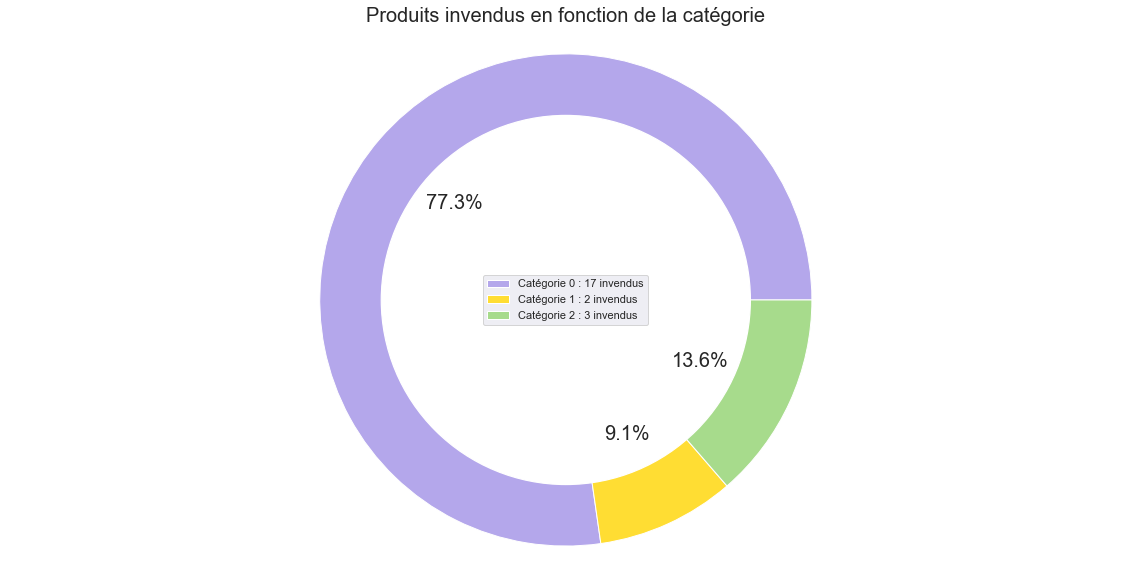

In [69]:
# Représentation graphique : diagramme
invendus_categ = produits_invendus[['categ', 'id_prod']].groupby('categ')\
                                                        .count().reset_index()

colors = ["#B4A7EB","#FFDD33","#A7DB8C"]
labels = ["Catégorie 0 : 17 invendus","Catégorie 1 : 2 invendus","Catégorie 2 : 3 invendus"]

plt.pie(invendus_categ.id_prod, labels=None, 
        textprops={'fontsize': 20},
        colors=colors, 
        autopct='%1.1f%%')
centre_circle = plt.Circle((0,0),0.75, fc="white", linewidth=1.25)
fig=plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')

plt.title('Produits invendus en fonction de la catégorie',fontsize=(20))

plt.legend(labels, loc="center")

plt.savefig("/Users/anissa/26_Produits invendus en fonction de la catégorie.jpg", 
                                                                        dpi=1200)
plt.show()

#### 6.2. Montant moyen des invendus par catégorie

In [70]:
produits_invendus.groupby(by="categ").mean()

price
categ         
0.0     13.650
1.0     35.775
2.0    164.890

#### 6.3. Total des produits invendus

In [71]:
produits_invendus["price"].sum()

798.27

----

# Mission n°3 - Corrélations

### 1. Existe-t-il une corrélation entre le sexe des clients et les catégories de produits achetés ?

#### 1.1. Représentation graphique : heatmap

In [72]:
# Tableau de contingence
rester_livres_sans_oct[["categ","sex"]].dtypes

X = "categ"
Y = "sex"

cont = rester_livres_sans_oct[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len)
cont

sex        f      m
categ              
0.0    94728  96043
1.0    54657  53412
2.0     7703   8689

In [73]:
# Tableau représentant le cas d'indépendance

tx = rester_livres_sans_oct[X].value_counts()
ty = rester_livres_sans_oct[Y].value_counts()
tx_df = pd.DataFrame(tx) #création du df
ty_df = pd.DataFrame(ty)
tx_df.columns = ["c"] #permet à la matrice des valeurs d'être alignée
ty_df.columns = ["c"]

n = len(rester_livres_sans_oct) # valeurs totales observées

# Matrice des valeurs en cas d'indépendance 
indep = (tx_df.dot(ty_df.T)/n) #on utilise pd.T pour faire pivoter une des deux séries (transpose index and columns)
indep

m             f
0.0  95705.033195  95065.966805
1.0  54215.510913  53853.489087
2.0   8223.455893   8168.544107

In [ ]:
# Mesure de l'écart au carré normalisé de la valeur attendue (indépendance) et de la valeur observée
plt.figure(figsize=(20,10))
col = ["femmes","hommes"]
y_noms = ["catégorie 0","catégorie 1","catégorie 2"]

measure = (cont-indep)**2/indep
xi_n = measure.sum().sum()

print("xi_n =", xi_n) 

table = (measure/xi_n)*100 #% de contribution à la non-indépendance

sns.heatmap(table, annot = True, annot_kws={"size":20}, xticklabels = col, yticklabels = y_noms,
                                                                               linewidths=.5)


plt.title('Corrélation entre le genre des clients et les catégories de produits',
                                                                     fontsize=20)
plt.savefig("/Users/anissa/27_Corrélation entre le genre des clients et les catégories de produits.jpg", 
                                                                                                dpi=1200)

xi_n = 79.17987649877874


On constate qu'il existe une forte corrélation entre les femmes et la catégorie 2. Les femmes sont plus propices à acheter des produits de la catégorie 2.

----

### 2. Existe-il une corrélation entre l'âge des clients et : 

#### 2.1. Le montant total des achats

##### 2.1.1. Étude quantitative

In [ ]:
# Montant total pour chaque client
montant_age = rester_livres_sans_oct.groupby(["client_id","age","price","tranche_age"])\
                            .agg({"price":"sum"})\
                            .rename(columns={"price":"montant"})\
                            .reset_index()
montant_age.head()

In [ ]:
montant_age_quant = montant_age.groupby("age")\
                                .agg({"montant":"mean"})\
                                .reset_index()
montant_age_quant.head()

In [ ]:
# Regression linéaire
X = montant_age_quant.age.values
Y = montant_age_quant.montant.values

In [ ]:
# Création du modèle
X_sm = sm.add_constant(X)
model = sm.OLS(Y,X_sm).fit()

# Calcul de r^2 et de la p-valeur
rsquare = model.rsquared
pval = model.pvalues[0] #seuil de risque 0%

In [ ]:
# Représentation graphique
plt.figure(figsize=(10,10))

plt.plot(X,Y,".")
plt.plot(X,model.predict(X_sm),"y--")

plt.xlabel("âge", size=15)
plt.ylabel ("dépense moyenne sur l'année", size=15)

print("r^2 :",round(rsquare,2))
print("p-value",round(pval,2))
print("Coefficient de Pearson :",math.sqrt(0.31),"soit -0,56")

plt.title("Corrélation entre l'âge des clients et le montant total",
                                                                     fontsize=20)
plt.savefig("/Users/anissa/28_Corrélation entre l'âge des clients et le montal total.jpg", dpi=1200)

plt.show()

On remarque 3 segments différents (18-30,30-50 et 50-93 ans)
Plus le coefficient de corrélation est proche de 1 plus la relation est forte. Lorsqu'il est égal à 0 il y a une absence de corrélation

Il existe une corrélation (relation négative) entre l'âge des clients et le montant total des achats. Plus l'âge augmente, moins le montant est elevé.

##### 2.1.2. Étude qualitative

On constate que 3 tranches d'âge se distiguent et on le même comportement, on effectuera alors une étude qualitative en fonction de ces tranches d'âge

In [ ]:
df_age = rester_livres_sans_oct
df_age = df_age.groupby(by=['client_id', 'tranche_age']).sum()
df_age = df_age.dropna().reset_index()

df_age.head()

In [ ]:
sns.set_context('talk')
sns.set_palette('Set2')
plt.figure(figsize=[10,10])

sns.boxplot(x='tranche_age', y='price', 
            data=df_age, 
            order=["18-","19-30","31-50","51-70","71+"])
plt.ylabel('montant des achats', size=15)
plt.xlabel("tranche d'âge", size=15)
plt.title("Montant des achats en fonction de la tranche d'âge des clients",
                                                    fontsize=20)
plt.ylim(0, 2500)

plt.savefig("/Users/anissa/29_Corrélation entre la tranche d'âge et le montant total.jpg", 
                                                                                dpi=1200)

plt.show()

***Calcul eta-2***

In [ ]:
X = rester_livres_sans_oct['tranche_age']
Y = rester_livres_sans_oct['price']

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
print('eta-squared :', eta_squared(X,Y)) # donc corrélation

#### 2.2. La fréquence d'achat (ie. nombre d'achats par mois par exemple)

##### 2.2.1. Étude quantitative

In [ ]:
frequence_achat = rester_livres_sans_oct[["client_id","age","tranche_age","id_prod","mois"]]

# On met les âges de côtés
c_ages = frequence_achat[["client_id","age","tranche_age"]].drop_duplicates()

# Nombre d'achat par mois
freq_achat_moy = frequence_achat.groupby(["client_id","mois"])\
                            .agg({"id_prod":"count"})\
                            .rename(columns={"id_prod":"total_achat"})\
                            .reset_index()
freq_achat_moy.head() # nombre d'achat par mois par client

In [ ]:
# Moyenne du nombre d'achat mensuel
nb_achat_moyen = freq_achat_moy.groupby("client_id")\
                                .agg({"total_achat":"mean"})\
                                .reset_index()

nb_achat_moyen.columns = ["client_id","nb_achat_mois_moyen"]

nb_achat_moyen.head()

In [ ]:
# Jointure entre les 2 df
df2 = pd.merge(c_ages,nb_achat_moyen, on="client_id")

# Moyenne des achats selon l'âge
achat_age = df2.groupby("age").agg({"nb_achat_mois_moyen":"mean"}).reset_index()

In [ ]:
# Régression linéaire

X = achat_age.age.values
Y = achat_age.nb_achat_mois_moyen.values

# Création du modèle
X_sm = sm.add_constant(X)
model = sm.OLS(Y,X_sm).fit()

# Calcul de r^2 et de p-valeur
rsquare = model.rsquared
pval = model.pvalues[0] #0% de seuil de risque

In [ ]:
plt.figure(figsize=(10,10))

plt.plot(X,Y,".")
plt.plot(X,model.predict(X_sm),"y--")

plt.xlabel("âge des clients", size=15)
plt.ylabel("nombre d'achats par mois (moyenne)", size=15)
plt.plot()

print("R^2=",round(rsquare,2))
print("p-valeur=",round(pval,2))
print("Coefficient de Pearson= ", math.sqrt(0.1)," soit -0,31")

plt.title("Corrélation entre l'âge des clients et la fréquence d'achat par mois",
                                                                     fontsize=20)

plt.savefig("/Users/anissa/30_Corrélation entre l'âge des clients et la fréquence d'achat par mois.jpg", 
                                                                                    dpi=1200)

3 segments  d'âge se distinguent et ont le même comportement

##### 2.2.2. Étude qualitative

In [ ]:
sns.set_context('talk')
sns.set_palette('Set2')
plt.figure(figsize=[10,10])

sns.boxplot(x='tranche_age', y='nb_achat_mois_moyen', 
            data=df2,
           order=["18-","19-30","31-50","51-70","71+"])
plt.ylabel("fréquence d'achats", size=15)
plt.xlabel("tranche d'âge", size=15)
plt.title("Fréquence d'achat en fonction de la tranche d'âge des clients", size=15)

plt.ylim(0, 15)

plt.savefig("/Users/anissa/31_Fréquence d'âge en fonction de la tranche d'âge des clients.jpg", dpi=1200)

plt.show()

##### 2.2.3. Calcul de eta-2

In [ ]:
Xa = df2["tranche_age"]
Ya = df2["nb_achat_mois_moyen"]

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
print('eta-squared :', eta_squared(Xa,Ya))

#### 3. La taille du panier moyen (en nombre d'articles)

##### 3.1. Étude quantitative

In [ ]:
df3 = rester_livres_sans_oct[["client_id","age","tranche_age","session_id","id_prod"]]

panier_moyen = df3[["client_id","session_id","id_prod"]]

# Nombre d'articles achetés par mois
panier_moyen = panier_moyen.groupby(["client_id","session_id"])\
                            .count().reset_index()
panier_moyen.columns = ["client_id","session_id","nb_articles"]

# Moyenne mensuel
panier_moyen = panier_moyen.groupby("client_id")\
                            .agg({"nb_articles":"mean"})\
                            .reset_index()
panier_moyen.columns = ["client_id","panier_moyen"]

df4 = pd.merge(c_ages,panier_moyen,on="client_id")

df4.head()

In [ ]:
# On regroupe par âge
df5 = df4.groupby("age").agg({"panier_moyen":"mean"}).reset_index()

df5.head()

In [ ]:
# Régression linéaire 
X = df5.age.values
Y = df5.panier_moyen.values

# Création du modèle
X_sm = sm.add_constant(X)
model = sm.OLS(Y,X_sm).fit()

# Calcul r^2 et de p-valeur
rsquare = model.rsquared
pval = model.pvalues[0]

In [ ]:
# Représentation graphique 
plt.figure(figsize=(10,10))
plt.plot(X,Y,".")
plt.plot(X, model.predict(X_sm),"y--")
plt.xlabel("âge des clients", size=15)
plt.ylabel("nombre d'articles", size=15)
plt.plot()
print("R^2 =",round(rsquare,2))
print("p-valeur =",round(pval))
print("Coefficient de Pearson =", math.sqrt(0.32), "soit -0,56")

plt.title("Corrélation entre l'âge des clients et le nombre d'articles achetés",
                                                                     fontsize=20)

plt.savefig("/Users/anissa/32_Corrélation entre l'âge des clients et le nombre d'article achetés.jpg", dpi=1200)

3 segments d'âge se distinguent et ont le même comportement

##### 3.2. Étude qualitative

In [ ]:
sns.set_context('talk')
sns.set_palette('Set2')
plt.figure(figsize=[10,10])

sns.boxplot(x='tranche_age', y='panier_moyen', 
            data=df4,
           order=["18-","19-30","31-50","51-70","71+"])
plt.ylabel('nombre d\'articles dans le panier', size=15)
plt.xlabel("tranche d'âge", size=15)
plt.title('Nombre d\'articles dans le panier en fonction de l\'âge')

plt.savefig("/Users/anissa/33_Nombre d'articles dans le panier en fonction de l'âge.jpg", 
                                                                                dpi=1200)

plt.show()

***Calcul de eta-2***

In [ ]:
Xa = "tranche_age"
Ya = "panier_moyen"

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT

print(f'Eta carré: {eta_squared(df4[Xa],df4[Ya]):.2f}') # donc corrélation

#### 3. Les catégories de produits achetés

##### 3.1. Représentation graphique : heatmap

In [ ]:
# Tableau de contingence
rester_livres_sans_oct[["categ","tranche_age"]].dtypes

X = "categ"
Y = "tranche_age"

contingence = rester_livres_sans_oct[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len)
contingence

In [ ]:
# Tableau représentant le cas d'indépendance

tx = rester_livres_sans_oct[X].value_counts()
ty = rester_livres_sans_oct[Y].value_counts()
tx_df = pd.DataFrame(tx) 
ty_df = pd.DataFrame(ty)
tx_df.columns = ["c"] 
ty_df.columns = ["c"]

n = len(rester_livres_sans_oct) 

# Matrice des valeurs en cas d'indépendance 
independance = (tx_df.dot(ty_df.T)/n) 
independance

In [ ]:
# Mesure de l'écart au carré normalisé de la valeur attendue (indépendance) et de la valeur observée
plt.figure(figsize=(20,10))

y_noms = ["catégorie 0","catégorie 1","catégorie 2"]

measure = (contingence-independance)**2/independance
xi_n = measure.sum().sum()

print("xi_n =", xi_n) 

corr_age_categ = (measure/xi_n)*100 #% de contribution à la non-indépendance

sns.heatmap(corr_age_categ, annot = True, annot_kws={"size":20}, 
                                            yticklabels = y_noms,
                                                   linewidths=.5)

plt.title("Corrélation entre l'âge des clients et les catégories de produits",
                                                                     fontsize=20)

plt.savefig("/Users/anissa/34_Corrélation entre l'âge des clients et les catégories de produits.jpg", 
                                                                                            dpi=1200)

Il y a une corrélation entre les tranches d'âge et la catégorie de produits achetés. On constate que la catégorie 2 est plus achetée par les 19-30 ans.